<a href="https://colab.research.google.com/github/nickfj94/Caso_de_estudio_salud/blob/main/Caso_estudio_salud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Diseño de la solución***

*   Laura Rojas Urzola
*   Nicolas Flórez Jiménez
*   Cristhian Guzmán Peña
---
#***Problema de negocio***

Atender la población de manera eficaz y eficiente logrando una optimización de recursos en este caso del tiempo quirúrgico.

#***Problema Analítico***
Predecir el uso mensual del recurso de tiempo quirúrgico de acuerdo con la clase funcional a la que pertenece el paciente.

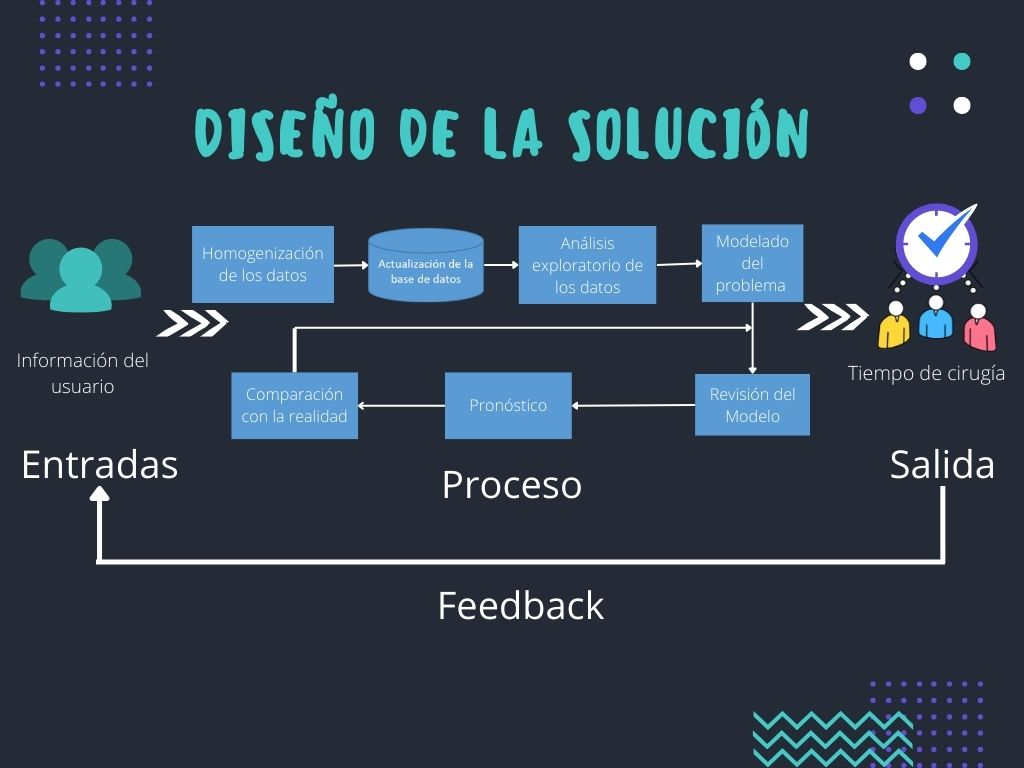

#*Carga de Datos*

In [ ]:
#Librerias
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, f_regression 
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_cronico = pd.read_csv('/content/drive/MyDrive/Analitica 3/Salud/RETO_df_cronicos.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (34,36,39,40,50,52,55,56,58,62,64,65,66,75,107,108,111,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df_cronico.columns[80:100]

Index(['HDL', 'Fecha HDL', 'Colesterol total', 'Fecha colesterol total',
       'Trigliceridos', 'Fecha trigliceridos', 'Clasificación de Framinghan',
       'Creatinina 1 consulta', 'Fecha creatinina1',
       'Tasa de Filtración Glomerular TFG', 'Estadio de la Enfermedad Renal',
       'Microalbuminuria', 'Fecha microalbuminuria',
       'Hormona Estimulante de la Tiroides (TSH)', 'Otras Morbilidades',
       'Clase Funcional', 'Creatinina 2 consulta', 'Fecha creatinina2',
       'Tasa de Filtración Glomerular TFG2', 'Meses de diferencia entre TFG'],
      dtype='object')

In [ ]:
#Carga datasets

df_cronico = pd.read_csv('/content/drive/MyDrive/Analitica 3/Salud/RETO_df_cronicos.csv')
df_cronico=pd.DataFrame(df_cronico,columns = ['YEAR',	'MES',	'NRODOC',	'Peso',	'Talla',	'IMC'	,'Clasificación IMC','Saturación de Oxígeno (%)',
                                              'Perímetro Muslo', 'Perímetro Cintura','Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo','Sumatoria Pliegues',
                                              'Frecuencia Cardíaca en reposo','METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno','Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
                                              'Velocidad (m/s)','Calificación Velocidad','Diabetes Mellitus','Tiene HTA','Tiene EPOC','Enfermedad Coronaria (En el último año)',
                                              'Insuficiencia Cardíaca', 'Valvulopatía','Arritmia o paciente con dispositivo','Sufre de alguna enfermedad cardiovascular',
                                              'Tabaquismo','Lipoproteina','HDL','Colesterol total','Trigliceridos','Clasificación de Framinghan','Creatinina 1 consulta',
                                              'Tasa de Filtración Glomerular TFG','Microalbuminuria','Hormona Estimulante de la Tiroides (TSH)'])
df_cx = pd.read_csv('/content/drive/MyDrive/Analitica 3/Salud/RETO_df_cx.csv')
df_egresos = pd.read_csv('/content/drive/MyDrive/Analitica 3/Salud/RETO_df_egresos.csv')
df_usuarios = pd.read_csv('/content/drive/MyDrive/Analitica 3/Salud/RETO_df_usuarios.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (4,6,7,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



# Organización de datos


Base de datos Crónico

In [ ]:
#Cronico
print(df_cronico.columns)
print(df_cronico.shape)
df_cronico.head(10)

Index(['YEAR', 'MES', 'NRODOC', 'Peso', 'Talla', 'IMC', 'Clasificación IMC',
       'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura',
       'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo',
       'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Tiene EPOC', 'Enfermedad Coronaria (En el último año)',
       'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Clasificación de Framinghan', 'Creatinina 1 consulta',
       'Tasa de Filtración Glomerular TFG', 'Microalbuminuria',
       'Hormona Estimulante de la Tiroides (TSH)'],
      dtype='obj

,YEAR,MES,NRODOC,Peso,Talla,IMC,Clasificación IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,...,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Clasificación de Framinghan,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
0,2017,OCTUBRE,311144,69.0,155.0,28.72,Sobrepeso,91.0,51.0,109.0,...,Si,60.68,53.95,128.00,67.33,Bajo riesgo,0.68,63.49,56.55,5.05
1,2017,OCTUBRE,308418,62.0,155.0,25.81,Sobrepeso,94.0,60.0,89.0,...,No,92.00,45.00,157.00,103.00,Alto riesgo,0.85,58.56,0.00,4.65
2,2017,OCTUBRE,308573,89.0,163.0,33.50,Obesidad Grasa,96.0,65.0,113.0,...,Si,43.00,30.00,115.00,204.00,Alto riesgo,1.32,62.09,12.00,5.41
3,2017,OCTUBRE,307549,88.0,163.0,33.12,Obesidad Grasa,73.0,66.0,108.0,...,No,102.00,41.00,170.00,138.00,Alto riesgo,1.00,68.57,3.56,13.73
4,2017,OCTUBRE,307044,58.0,158.0,23.23,Normal,97.0,59.0,90.0,...,No,30.00,68.00,110.00,0.00,Bajo riesgo,1.39,29.56,0.00,0.00
5,2017,OCTUBRE,309419,53.0,146.0,24.86,Normal,94.0,55.0,88.0,...,Si,0.00,0.00,0.00,0.00,Bajo riesgo,0.99,37.29,0.00,0.00
6,2017,OCTUBRE,308437,43.0,139.0,22.26,Normal,85.0,48.0,91.0,...,Si,0.00,0.00,0.00,0.00,Bajo riesgo,0.00,0.00,0.00,0.00
7,2017,OCTUBRE,308437,43.0,138.0,22.58,Normal,88.0,49.0,89.0,...,Si,41.78,40.57,102.73,101.92,Bajo riesgo,0.65,46.08,17.03,1.08
8,2017,OCTUBRE,308637,55.0,158.0,22.03,Normal,90.0,56.0,96.0,...,No,0.00,0.00,0.00,0.00,Bajo riesgo,0.00,0.00,0.00,0.00
9,2017,OCTUBRE,308561,71.0,160.0,27.73,Sobrepeso,96.0,65.0,100.0,...,No,44.00,38.00,98.00,80.00,Bajo riesgo,0.99,62.65,8.08,7.38


In [ ]:
df_cronico.describe()

,YEAR,NRODOC,Peso,Talla,IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,Pliegue Triceps,Pliegue Abdomen,...,Índice de Fragilidad Groningen,Velocidad (m/s),Lipoproteina,HDL,Colesterol total,Trigliceridos,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
count,38736.000000,38736.000000,38736.000000,38736.000000,38736.000000,38595.000000,38736.000000,38736.000000,38736.000000,38736.000000,...,38689.000000,38736.000000,37964.000000,37964.000000,37964.000000,37964.000000,37964.000000,37964.000000,37964.000000,37964.000000
mean,2020.178748,310071.714168,69.782151,157.516090,356.910079,94.482705,48.285445,94.988484,16.873322,26.291112,...,4.740857,0.762149,54.454581,42.438830,140.020514,137.245262,0.998665,63.597162,35.114345,3.866214
std,1.733640,2210.219197,317.324359,131.684595,12432.944727,8.890822,31.863374,75.499130,21.180946,35.485320,...,3.163919,0.481739,136.081541,106.713196,65.804055,246.384417,1.876320,287.223820,273.847093,63.061709
min,2017.000000,306221.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,308166.000000,59.000000,150.000000,24.030000,93.000000,40.000000,87.000000,10.000000,14.000000,...,2.000000,0.560000,0.000000,33.000000,114.500000,80.500000,0.680000,39.870000,0.100000,0.020000
50%,2021.000000,310080.000000,67.000000,156.000000,27.100000,95.000000,50.000000,97.000000,15.000000,25.000000,...,4.000000,0.710000,53.390000,41.000000,141.000000,118.200000,0.920000,56.105000,0.920000,1.850000
75%,2021.000000,311868.000000,76.500000,163.000000,30.860000,96.000000,56.000000,106.000000,22.000000,35.000000,...,7.000000,1.000000,84.000000,50.200000,173.000000,168.000000,1.010000,78.482500,7.500000,3.510000
max,2022.000000,314220.000000,62153.000000,15797.000000,800000.000000,995.000000,5730.000000,10758.000000,2732.000000,4843.000000,...,15.000000,5.000000,8279.000000,7241.000000,1947.000000,15121.000000,112.000000,55031.300000,23138.000000,5367.000000


In [ ]:
df_cronico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38736 entries, 0 to 38735
Data columns (total 39 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       38736 non-null  int64  
 1   MES                                        38736 non-null  object 
 2   NRODOC                                     38736 non-null  int64  
 3   Peso                                       38736 non-null  float64
 4   Talla                                      38736 non-null  float64
 5   IMC                                        38736 non-null  float64
 6   Clasificación IMC                          38736 non-null  object 
 7   Saturación de Oxígeno (%)                  38595 non-null  float64
 8   Perímetro Muslo                            38736 non-null  float64
 9   Perímetro Cintura                          38736 non-null  float64
 10  Pliegue Triceps       

In [ ]:
df_cronico[df_cronico['Diabetes Mellitus'].isnull()]

,YEAR,MES,NRODOC,Peso,Talla,IMC,Clasificación IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,...,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Clasificación de Framinghan,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
91,2017,OCTUBRE,306977,50.0,149.0,22.52,Normal,94.0,49.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2017,OCTUBRE,306309,57.0,160.0,22.27,Normal,94.0,48.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,2017,OCTUBRE,308708,57.0,159.0,22.55,Normal,92.0,46.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,2017,OCTUBRE,308605,72.0,161.0,27.78,Sobrepeso,95.0,61.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,2017,OCTUBRE,308034,62.0,145.0,29.49,Sobrepeso,95.0,59.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37219,2022,MAYO,314044,70.0,150.0,31.11,Obesidad Grasa,99.0,60.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37991,2022,MAYO,307767,60.0,150.0,26.67,Sobrepeso,95.0,40.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38091,2022,MAYO,311709,56.0,170.0,19.38,Normal,93.0,20.0,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38396,2022,MAYO,314155,68.0,160.0,26.56,Sobrepeso,89.0,50.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_cronico = df_cronico.dropna(subset=['Diabetes Mellitus'])

In [ ]:
#Separar la base de datos antes y despues de pandemia
df_cronico = df_cronico.sort_values('YEAR')
df_cronico = df_cronico.reset_index(drop=True)
df_cronico

,YEAR,MES,NRODOC,Peso,Talla,IMC,Clasificación IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,...,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Clasificación de Framinghan,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
0,2017,OCTUBRE,311144,69.0,155.0,28.72,Sobrepeso,91.0,51.0,109.0,...,Si,60.6800,53.95,128.00,67.33,Bajo riesgo,0.68,63.49,56.55,5.05
1,2017,NOVIEMBRE,310805,84.0,170.0,29.07,Sobrepeso,93.0,55.0,112.0,...,No,69.0000,34.00,135.00,158.00,Bajo riesgo,1.08,88.15,21.55,1.27
2,2017,NOVIEMBRE,309988,69.0,150.0,30.67,Obesidad Grasa,93.0,57.0,103.0,...,No,0.0211,60.00,309.00,189.00,Alto riesgo,0.77,75.11,2.76,0.00
3,2017,NOVIEMBRE,311112,66.0,165.0,24.24,Normal,96.0,50.0,98.0,...,No,0.0000,57.00,185.00,0.00,NaN,1.22,32.57,21.00,0.00
4,2017,NOVIEMBRE,306475,84.0,155.0,34.96,Obesidad Grasa,90.0,63.0,105.0,...,No,67.0000,77.00,157.00,642.00,Alto riesgo,0.74,87.11,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37959,2022,FEBRERO,309038,80.0,160.0,31.25,Obesidad Grasa,98.0,50.0,50.0,...,No,43.8600,34.50,111.20,142.30,Bajo riesgo,0.63,74.96,0.44,3.00
37960,2022,FEBRERO,312594,70.0,165.0,25.71,Sobrepeso,96.0,50.0,100.0,...,No,67.6500,36.30,160.80,207.50,Alto riesgo,1.52,39.66,5.30,0.97
37961,2022,FEBRERO,313435,68.0,162.0,25.91,Sobrepeso,94.0,20.0,90.0,...,No,0.0000,37.00,159.20,305.40,Alto riesgo,1.93,31.32,51.67,9.05
37962,2022,FEBRERO,309561,65.0,150.0,28.89,Sobrepeso,94.0,50.0,100.0,...,No,0.0000,39.57,218.30,170.70,Bajo riesgo,0.67,96.21,2.18,6.82


In [ ]:
df_cronico.loc[df_cronico.loc[:, 'YEAR'] == 2021]

,YEAR,MES,NRODOC,Peso,Talla,IMC,Clasificación IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,...,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Clasificación de Framinghan,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
12559,2021,SEPTIEMBRE,312949,65.0,165.0,23.88,Normal,95.0,35.0,78.0,...,No,0.00,38.94,124.6,91.8,Alto riesgo,0.92,53.38,2.49,0.96
12560,2021,SEPTIEMBRE,312673,115.0,180.0,35.49,Obesidad Grasa,92.0,46.0,120.0,...,No,0.00,31.69,114.2,165.5,Bajo riesgo,0.93,128.81,5.00,3.47
12561,2021,SEPTIEMBRE,306897,63.0,142.0,31.24,Obesidad Grasa,92.0,55.0,106.0,...,No,62.33,40.20,218.4,399.1,Bajo riesgo,0.89,47.63,0.10,4.09
12562,2021,SEPTIEMBRE,310682,60.0,160.0,23.44,Normal,96.0,39.0,89.0,...,No,0.00,39.05,162.2,178.1,Alto riesgo,0.92,46.97,2.92,6.79
12563,2021,SEPTIEMBRE,313352,59.0,150.0,26.22,Sobrepeso,98.0,53.0,86.0,...,No,79.00,42.70,150.3,139.4,Alto riesgo,0.79,65.24,0.27,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28801,2021,JUNIO,311733,67.0,145.0,31.87,Obesidad Grasa,94.0,56.0,95.0,...,No,154.30,47.91,211.8,140.8,Alto riesgo,0.85,56.76,204.00,6.63
28802,2021,JUNIO,307719,62.0,155.0,25.81,Sobrepeso,96.0,34.0,108.0,...,No,0.00,51.94,211.8,94.4,Bajo riesgo,0.25,140.53,0.00,2.64
28803,2021,JUNIO,308040,60.1,150.0,26.71,Sobrepeso,94.0,25.0,80.0,...,No,0.00,36.50,122.5,284.2,Bajo riesgo,1.45,20.06,8.30,2.95
28804,2021,JUNIO,309734,53.0,142.0,26.28,Sobrepeso,100.0,44.0,96.0,...,No,0.00,0.00,0.0,0.0,Alto riesgo,0.00,0.00,0.00,3.22


In [ ]:
df_cronicoPos = df_cronico.iloc[12559:,:]
df_cronicoPre = df_cronico.iloc[:12559,:]

In [ ]:
print(df_cronicoPre['YEAR'].unique())
df_cronicoPre

[2017 2018]


,YEAR,MES,NRODOC,Peso,Talla,IMC,Clasificación IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,...,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Clasificación de Framinghan,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
0,2017,OCTUBRE,311144,69.0,155.0,28.72,Sobrepeso,91.0,51.0,109.0,...,Si,60.6800,53.95,128.0,67.33,Bajo riesgo,0.68,63.49,56.55,5.05
1,2017,NOVIEMBRE,310805,84.0,170.0,29.07,Sobrepeso,93.0,55.0,112.0,...,No,69.0000,34.00,135.0,158.00,Bajo riesgo,1.08,88.15,21.55,1.27
2,2017,NOVIEMBRE,309988,69.0,150.0,30.67,Obesidad Grasa,93.0,57.0,103.0,...,No,0.0211,60.00,309.0,189.00,Alto riesgo,0.77,75.11,2.76,0.00
3,2017,NOVIEMBRE,311112,66.0,165.0,24.24,Normal,96.0,50.0,98.0,...,No,0.0000,57.00,185.0,0.00,NaN,1.22,32.57,21.00,0.00
4,2017,NOVIEMBRE,306475,84.0,155.0,34.96,Obesidad Grasa,90.0,63.0,105.0,...,No,67.0000,77.00,157.0,642.00,Alto riesgo,0.74,87.11,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12554,2018,MAYO,308042,125.0,178.0,39.45,Obesidad Grasa,87.0,65.0,131.0,...,No,0.0000,0.00,0.0,0.00,NaN,1.66,56.01,3.67,0.00
12555,2018,MAYO,311128,74.0,150.0,32.89,Obesidad Grasa,94.0,57.0,103.0,...,No,44.8700,50.54,122.0,134.00,NaN,1.00,53.29,0.00,0.00
12556,2018,MAYO,307755,58.0,150.0,25.78,Sobrepeso,98.0,51.0,97.0,...,No,72.0000,54.00,164.0,184.00,NaN,1.00,45.88,7.60,0.00
12557,2018,MAYO,306589,55.0,140.0,28.06,Sobrepeso,96.0,54.0,90.0,...,No,94.0000,62.00,179.0,113.00,NaN,1.00,48.05,10.60,3.33


In [ ]:
print(df_cronicoPos['YEAR'].unique())
df_cronicoPos

[2021 2022]


,YEAR,MES,NRODOC,Peso,Talla,IMC,Clasificación IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,...,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Clasificación de Framinghan,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
12559,2021,SEPTIEMBRE,312949,65.0,165.0,23.88,Normal,95.0,35.0,78.0,...,No,0.00,38.94,124.60,91.80,Alto riesgo,0.92,53.38,2.49,0.96
12560,2021,SEPTIEMBRE,312673,115.0,180.0,35.49,Obesidad Grasa,92.0,46.0,120.0,...,No,0.00,31.69,114.20,165.50,Bajo riesgo,0.93,128.81,5.00,3.47
12561,2021,SEPTIEMBRE,306897,63.0,142.0,31.24,Obesidad Grasa,92.0,55.0,106.0,...,No,62.33,40.20,218.40,399.10,Bajo riesgo,0.89,47.63,0.10,4.09
12562,2021,SEPTIEMBRE,310682,60.0,160.0,23.44,Normal,96.0,39.0,89.0,...,No,0.00,39.05,162.20,178.10,Alto riesgo,0.92,46.97,2.92,6.79
12563,2021,SEPTIEMBRE,313352,59.0,150.0,26.22,Sobrepeso,98.0,53.0,86.0,...,No,79.00,42.70,150.30,139.40,Alto riesgo,0.79,65.24,0.27,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37959,2022,FEBRERO,309038,80.0,160.0,31.25,Obesidad Grasa,98.0,50.0,50.0,...,No,43.86,34.50,111.20,142.30,Bajo riesgo,0.63,74.96,0.44,3.00
37960,2022,FEBRERO,312594,70.0,165.0,25.71,Sobrepeso,96.0,50.0,100.0,...,No,67.65,36.30,160.80,207.50,Alto riesgo,1.52,39.66,5.30,0.97
37961,2022,FEBRERO,313435,68.0,162.0,25.91,Sobrepeso,94.0,20.0,90.0,...,No,0.00,37.00,159.20,305.40,Alto riesgo,1.93,31.32,51.67,9.05
37962,2022,FEBRERO,309561,65.0,150.0,28.89,Sobrepeso,94.0,50.0,100.0,...,No,0.00,39.57,218.30,170.70,Bajo riesgo,0.67,96.21,2.18,6.82


In [ ]:
df_cronicoPos = df_cronicoPos.drop(['YEAR', 'MES'], axis=1)
print(df_cronicoPos.duplicated().sum())
df_cronicoPre = df_cronicoPre.drop(['YEAR', 'MES'], axis=1)
print(df_cronicoPre.duplicated().sum())

1559
0


In [ ]:
df_cronicoPos=df_cronicoPos.drop_duplicates()

In [ ]:
df_cronicoPos.duplicated().sum()

0

In [ ]:
df_cronicoPos = df_cronicoPos.reset_index(drop=True)

In [ ]:
df_cronicoPos['Clasificación IMC'].unique()

array(['Normal', 'Obesidad Grasa', 'Sobrepeso', 'Bajo'], dtype=object)

In [ ]:
df_cronicoPos

,NRODOC,Peso,Talla,IMC,Clasificación IMC,Saturación de Oxígeno (%),Perímetro Muslo,Perímetro Cintura,Pliegue Triceps,Pliegue Abdomen,...,Tabaquismo,Lipoproteina,HDL,Colesterol total,Trigliceridos,Clasificación de Framinghan,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH)
0,312949,65.0,165.0,23.88,Normal,95.0,35.0,78.0,5.0,5.0,...,No,0.00,38.94,124.60,91.80,Alto riesgo,0.92,53.38,2.49,0.96
1,312673,115.0,180.0,35.49,Obesidad Grasa,92.0,46.0,120.0,17.0,23.0,...,No,0.00,31.69,114.20,165.50,Bajo riesgo,0.93,128.81,5.00,3.47
2,306897,63.0,142.0,31.24,Obesidad Grasa,92.0,55.0,106.0,34.0,33.0,...,No,62.33,40.20,218.40,399.10,Bajo riesgo,0.89,47.63,0.10,4.09
3,310682,60.0,160.0,23.44,Normal,96.0,39.0,89.0,10.0,10.0,...,No,0.00,39.05,162.20,178.10,Alto riesgo,0.92,46.97,2.92,6.79
4,313352,59.0,150.0,26.22,Sobrepeso,98.0,53.0,86.0,32.0,40.0,...,No,79.00,42.70,150.30,139.40,Alto riesgo,0.79,65.24,0.27,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23841,309038,80.0,160.0,31.25,Obesidad Grasa,98.0,50.0,50.0,40.0,50.0,...,No,43.86,34.50,111.20,142.30,Bajo riesgo,0.63,74.96,0.44,3.00
23842,312594,70.0,165.0,25.71,Sobrepeso,96.0,50.0,100.0,5.0,5.0,...,No,67.65,36.30,160.80,207.50,Alto riesgo,1.52,39.66,5.30,0.97
23843,313435,68.0,162.0,25.91,Sobrepeso,94.0,20.0,90.0,3.0,3.0,...,No,0.00,37.00,159.20,305.40,Alto riesgo,1.93,31.32,51.67,9.05
23844,309561,65.0,150.0,28.89,Sobrepeso,94.0,50.0,100.0,10.0,10.0,...,No,0.00,39.57,218.30,170.70,Bajo riesgo,0.67,96.21,2.18,6.82


Base de Datos Cirugía

In [ ]:
#Cirugias
print(df_cx.columns)
print(df_cx.shape)
df_cx.head(10)

Index(['YEAR', 'MES', 'CODIGO SERVICIO HABILITACION', 'SERVICIO HABILITACION',
       'TIPO IDENTIFICACION', 'NRODOC', 'FECHA NACIMIENTO', 'REGIMEN',
       'CODIGO EPS', 'DESCRIPCION EPS VALIDADA', 'FECHA ORDEN', 'HORA ORDEN',
       'ORIGEN ORDEN', 'FECHA AUDITA ORDEN', 'HORA AUDITA ORDEN',
       'ORIGEN ADMSION', 'BLOQUE', 'PISO', 'SERVICIO', 'BLOQUE DESTINO',
       'CAMA DESTINO', 'PISO DESTINO', 'SERVICIO DESTINO', 'QUIROFANO',
       'TIPO PROCEDIMIENTO', 'FECHA PREANESTESIA', 'ASA', 'FECHA CIRUGIA',
       'HORA CIRUGIA', 'HORA ENTRADA QX', 'HORA INICIO ANESTESIA',
       'TIPO DE ANESTESIA', 'HORA INICIO CX', 'HORA FIN CX',
       'HORA FIN ANESTESIA', 'FECHA RECUPERACION CX', 'HORA SALIDA QX', 'VIA',
       'COD CUPS', 'NOMBRE DE PROCEDIMIENTO', 'PROCEDIMIENTO 0256', 'CODCUPS1',
       'PROCEDIMIENTOCIRUGIA1', 'CODCUPS2', 'PROCEDIMIENTOCIRUGIA2',
       'CODCUPS3', 'PROCEDIMIENTOCIRUGIA3', 'CODCUPS4',
       'PROCEDIMIENTOCIRUGIA4', 'CODCUPS5', 'PROCEDIMIENTOCIRUGIA5',
     

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN,CODIGO EPS,DESCRIPCION EPS VALIDADA,...,COD DIAGNOSTICO POSTQUIRURGICO,DIAGNOSTICO POSTQUIRURGICO,TIPO DE HERIDA,TIPO AISLAMIENTO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD,SEDE,IDCX,ADMISION
0,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Sucia,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
1,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Sucia,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
2,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Sucia,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
3,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Sucia,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
4,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Sucia,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
5,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Sucia,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
6,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Limpia Contaminada,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
7,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Limpia Contaminada,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
8,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Contaminada,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320
9,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,NaN,NaN,...,NaN,NaN,Contaminada,NaN,NaN,NaN,Cirugia General,LEON XIII,NaN,3395320


In [ ]:
df_cx['PROCEDIMIENTOCIRUGIA1'].unique()

array(['DRENAJE DE ABSCESO SUBFRÉNICO O SUBDIAFRAGMÁTICO- CUALQUIER VÍA',
       'LAVADO PERITONEAL POSTQUIRÚRGICO POR LAPAROTOMÍA CON O SIN ABDOMEN ABIERTO',
       'TRAQUEOSTOMÍA',
       'DRENAJE- CURETAJESECUESTRECTOMÍA DE DOS O MÁS FALANGES POR OSTEOMIELITIS- TUMOR BENIGNO O LESIONES PARATUMORALES.',
       'RESECCIONES INTESTINALES INCLUYE ANASTOMOSIS',
       'URETROTOMÍA INTERNA ENDOSCÓPICA',
       'CISTOTOMÍA SUPRAPÚBICA (TALLA VESICAL)',
       'OSTEOSÍNTESIS DE CUELLO DE FÉMURO SUBCAPITAL- O INTERTROCANTÉRICA O SUBTROCANTÉRICA- O CONDÍLEA O SUPRACONDÍLEA',
       'DRENAJE- CURETAJESECUESTRECTOMÍA DE PELVIS- POR OSTEOMIELITIS- TUMOR BENIGNO O LESIONES PARATUMORALES.',
       'COLGAJO DE VECINDAD (MUSCULARESFASCIOCUTÁNEOS- MÚSCULOCUTÁNEOS- OSTEOMÚSCULOCUTÁNEOS).',
       'LAPAROSCOPIA CON O SIN BIOPSIA',
       'E.R.C.P. para colocación o reinserción de STENT en conducto biliar o pancreático - endoscopias terapeuticas',
       'DESARTICULACIÓN DE LA RODILLA',
       'REVISIÓN

In [ ]:
#Eliminación de Columnas  
df_cx1 = df_cx.drop(['REGIMEN','CODIGO EPS','HORA ORDEN',
       'ORIGEN ORDEN', 'FECHA AUDITA ORDEN', 'HORA AUDITA ORDEN',
       'ORIGEN ADMSION', 'BLOQUE', 'PISO', 'SERVICIO', 'BLOQUE DESTINO',
       'CAMA DESTINO', 'PISO DESTINO', 'SERVICIO DESTINO','QUIROFANO','CODCUPS1',
       'PROCEDIMIENTOCIRUGIA1', 'CODCUPS2', 'PROCEDIMIENTOCIRUGIA2',
       'CODCUPS3', 'PROCEDIMIENTOCIRUGIA3', 'CODCUPS4',
       'PROCEDIMIENTOCIRUGIA4', 'CODCUPS5', 'PROCEDIMIENTOCIRUGIA5',
       'CODCUPS6', 'PROCEDIMIENTOCIRUGIA6', 'CODCUPS7',
       'PROCEDIMIENTOCIRUGIA7', 'CODCUPS8', 'PROCEDIMIENTOCIRUGIA8',
       'CODCUPS9', 'PROCEDIMIENTOCIRUGIA9', 'CODCUPS10',
       'PROCEDIMIENTOCIRUGIA10','TIPO DE HERIDA', 'TIPO AISLAMIENTO','SEDE','CODCUPS1',
       'PROCEDIMIENTOCIRUGIA1', 'CODCUPS2', 'PROCEDIMIENTOCIRUGIA2', 'CODCUPS3', 'PROCEDIMIENTOCIRUGIA3', 
       'CODCUPS4', 'PROCEDIMIENTOCIRUGIA4', 'CODCUPS5', 'PROCEDIMIENTOCIRUGIA5', 'CODCUPS6', 'PROCEDIMIENTOCIRUGIA6',
       'CODCUPS7', 'PROCEDIMIENTOCIRUGIA7', 'CODCUPS8', 'PROCEDIMIENTOCIRUGIA8', 'CODCUPS9', 'PROCEDIMIENTOCIRUGIA9', 
       'CODCUPS10', 'PROCEDIMIENTOCIRUGIA10','CIE 10 TERCER CARACTER','IDCX', 'ADMISION','HORA INICIO ANESTESIA','HORA INICIO CX',
       'HORA FIN CX','HORA FIN ANESTESIA','COD DIAGNOSTICO POSTQUIRURGICO','DIAGNOSTICO POSTQUIRURGICO',], axis=1)

In [ ]:
df_cx1.isnull().sum()

YEAR                                0
MES                                 0
CODIGO SERVICIO HABILITACION      382
SERVICIO HABILITACION             382
TIPO IDENTIFICACION                 0
NRODOC                              0
FECHA NACIMIENTO                   88
DESCRIPCION EPS VALIDADA         1283
FECHA ORDEN                         6
TIPO PROCEDIMIENTO                923
FECHA PREANESTESIA                844
ASA                               750
FECHA CIRUGIA                      69
HORA CIRUGIA                     1283
HORA ENTRADA QX                   361
TIPO DE ANESTESIA                 593
FECHA RECUPERACION CX             653
HORA SALIDA QX                    361
VIA                              1283
COD CUPS                          361
NOMBRE DE PROCEDIMIENTO           361
PROCEDIMIENTO 0256                545
COD DIAGNOSTICO PREQUIRURGICO     345
DESCRIPCION PREQUIRURGICO         346
DESCRIPCION TERCER CARACTER       358
CAPITULO CIE10                    358
NOMBRE CAPIT

In [ ]:
df_cx1

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,DESCRIPCION EPS VALIDADA,FECHA ORDEN,TIPO PROCEDIMIENTO,...,NOMBRE DE PROCEDIMIENTO,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,DESCRIPCION PREQUIRURGICO,DESCRIPCION TERCER CARACTER,CAPITULO CIE10,NOMBRE CAPITULO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD
0,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
1,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
2,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,2017-04-02 00:00:00,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
3,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,2017-04-02 00:00:00,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
4,2017,ABRIL,203.0,Cirugía General,CC,306809,NaN,NaN,2017-04-07 11:11:35,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,2022,MAYO,207.0,CIRUGIA ORTOPEDICA,CC,312770,1950-05-07 00:00:00,NUEVA EPS S.A. PGP,2022-05-27 00:00:00,QUIRURGICO,...,DESCOMPRESION DE NERVIO EN TUNEL DEL CARPO CON...,44304.0,G560,SINDROME DEL TUNEL CARPIANO,MONONEUROPATIAS DEL MIEMBRO SUPERIOR,G00-G99,ENFERMEDADES DEL SISTEMA NERVIOSO,False,3.0,ORTOPEDIA
2366,2022,MAYO,207.0,CIRUGIA ORTOPEDICA,CC,313334,1947-03-28 00:00:00,NUEVA EPS S.A. PGP,2022-05-28 00:00:00,QUIRURGICO,...,DESCOMPRESION DE NERVIO EN TUNEL DEL CARPO CON...,44304.0,G560,SINDROME DEL TUNEL CARPIANO,MONONEUROPATIAS DEL MIEMBRO SUPERIOR,G00-G99,ENFERMEDADES DEL SISTEMA NERVIOSO,False,3.0,ORTOPEDIA
2367,2022,JUNIO,213.0,CIRUGIA PLASTICA Y ESTETICA,CC,307306,1936-10-15 00:00:00,NUEVA EPS S.A.,2022-06-02 00:00:00,QUIRURGICO,...,COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD EN...,867203.0,C443,TUMOR MALIGNO DE LA PIEL DE OTRAS PARTES Y DE ...,OTROS TUMORES MALIGNO DE LA PIEL,C00-D48,TUMORES {NEOPLASIAS},False,2.0,CIRUGIA PLASTICA
2368,2022,JUNIO,203.0,CIRUGIA GENERAL,CC,307270,1956-12-22 00:00:00,NUEVA EPS S.A. PGP,2022-06-06 00:00:00,QUIRURGICO,...,HERNIORRAFIA EPIGASTRICA VIA ABIERTA,535204.0,K439,OTRAS HERNIAS VENTRALES Y LAS NO ESPECIFICADAS...,HERNIA VENTRAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,2.0,CIRUGIA GENERAL


In [ ]:
df_cx1['CODIGO SERVICIO HABILITACION'].unique()

array([203., 207., 215., 209., 234., 214., 205., 204., 206., 217., 213.,
       202., 208., 241., 210., 235., 218., 201., 244., 245.,  nan])

In [ ]:
df_cx1['CODIGO SERVICIO HABILITACION'].isnull().sum()

382

In [ ]:
df_cx1['SERVICIO HABILITACION'].isnull().sum()

382

In [ ]:
#Quitar espacios
df_cx1['SERVICIO HABILITACION']=df_cx['SERVICIO HABILITACION'].str.strip()
#Convertir en minuscula los datos
df_cx1['SERVICIO HABILITACION']=df_cx['SERVICIO HABILITACION'].str.lower()

In [ ]:
"""
Hay datos iguales, pero escritos de diferentes formas
"""
df_cx1['SERVICIO HABILITACION'].unique()

array(['cirugía general', 'cirugía ortopédica', 'cirugía urológica',
       'cirugía otorrinolaringología', 'cirugía de tórax',
       'cirugía vascular y angiológica', 'cirugía maxilofacial',
       'cirugía ginecológica', 'cirugía neurológica', 'otras cirugías',
       'cirugía plástica y estética', 'cirugía cardiovascular',
       'cirugía oftalmológica', 'trasplante de tejido osteomuscular',
       'cirugía general (cirugia cabeza y cuello)', 'cirugía oncológica',
       'cirugía gastrointestinal', 'cirugía endovascular neurológica',
       'trasplante osteomuscular', 'cirugia ortopedica',
       'trasplante tejidos cardiovasculares', 'cirugia urologica',
       'neurocirugia', 'cirugia de torax', 'cirugia general',
       'cirugia vascular y angiologica', 'cirugia oncologica',
       'otras cirugias', 'cirugia ginecologica',
       'cirugia de cabeza y cuello', 'cirugia maxilofacial',
       'cirugia plastica y estetica', 'cirugia otorrinolaringologia',
       'cirugia cardiovascu

In [ ]:
#Cambio en los calores de la variable "SERVICIO HABILITACION"
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía general','cirugia general'],'cirugia general')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía ortopédica','cirugia ortopedica'],'cirugia ortopedica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía urológica','cirugia urologica'],'cirugia urologica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía otorrinolaringología','cirugia otorrinolaringologia'],'cirugia otorrinolaringologia')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía de tórax','cirugia de torax'],'cirugia de torax')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía vascular y angiológica','cirugia vascular y angiologica'],'cirugia vascular y angiologica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía maxilofacial','cirugia maxilofacial'],'cirugia maxilofacial')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía ginecológica','cirugia ginecologica'],'cirugia ginecologica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía neurológica'],'cirugia neurologica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['otras cirugías','otras cirugias'],'otras cirugias')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía plástica y estética','cirugia plastica y estetica'],'cirugia plastica y estetica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía cardiovascular','cirugia cardiovascular'],'cirugia cardiovascular')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía oftalmológica'],'cirugia oftalmologica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['trasplante de tejido osteomuscular'],'trasplante osteomuscular')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía oncológica'],'cirugia oncologica')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía gastrointestinal'],'cirugia gastrointestinal')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['trasplante tejidos cardiovasculares'],'trasplante cardiovascular')
df_cx1['SERVICIO HABILITACION']= df_cx1['SERVICIO HABILITACION'].replace(['cirugía general (cirugia cabeza y cuello)','cirugia de cabeza y cuello'],'cirugia de cabeza y cuello')

In [ ]:
df_cx1.loc[1263,'SERVICIO HABILITACION'] = 'cirugía endovascular neurológica'
df_cx1.loc[529,'CODIGO SERVICIO HABILITACION'] = 201
df_cx1.loc[636,'CODIGO SERVICIO HABILITACION'] = 201
df_cx1.loc[763,'CODIGO SERVICIO HABILITACION'] = 201

In [ ]:
df_cx1['CODIGO SERVICIO HABILITACION'].unique()

array([203., 207., 215., 209., 234., 214., 205., 204., 206., 217., 213.,
       202., 208., 241., 201., 210., 235., 218., 244., 245.,  nan])

In [ ]:
###Revisar cirugia general (cabeza y cuello), cirugias neurologicas (¿nuerocirugia diferente a cirugia neurologica)
df_cx1.loc[df_cx1.loc[:, 'SERVICIO HABILITACION'] == 'cirugia general']#'cirugia de cabeza y cuello' 'cirugía general (cirugia cabeza y cuello)'

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,DESCRIPCION EPS VALIDADA,FECHA ORDEN,TIPO PROCEDIMIENTO,...,NOMBRE DE PROCEDIMIENTO,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,DESCRIPCION PREQUIRURGICO,DESCRIPCION TERCER CARACTER,CAPITULO CIE10,NOMBRE CAPITULO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD
0,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
1,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
2,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-04-02 00:00:00,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
3,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-04-02 00:00:00,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
4,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-04-07 11:11:35,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,2021,NOVIEMBRE,203.0,cirugia general,CC,313777,1948-07-11 00:00:00,NUEVA EPS S.A. PGP,2021-11-12 00:00:00,Quirúrgicas,...,HERNIORRAFIA UMBILICAL VIA ABIERTA,534001.0,K429,HERNIA UMBILICAL SIN OBSTRUCCION NI GANGRENA,HERNIA UMBILICAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO (K00-K93),False,2.0,Cirugia General
2351,2022,MARZO,203.0,cirugia general,CC,312396,1944-11-20 00:00:00,NUEVA EPS S.A. PGP,2022-03-18 00:00:00,QUIRURGICO,...,RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL O...,864204.0,L720,QUISTE EPIDERMICO,QUISTE FOLICULAR DE LA PIEL Y DEL TEJIDO SUBCU...,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,2.0,CIRUGIA GENERAL
2357,2022,MAYO,203.0,cirugia general,CC,313376,1958-05-24 00:00:00,NUEVA EPS S.A. PGP,2022-05-11 00:00:00,QUIRURGICO,...,HERNIORRAFIA INGUINAL UNILATERAL VIA ABIERTA,530001.0,K409,HERNIA INGUINAL UNILATERAL O NO ESPECIFICADA ...,HERNIA INGUINAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,2.0,CIRUGIA GENERAL
2358,2022,MAYO,203.0,cirugia general,CC,308159,1953-09-02 00:00:00,NUEVA EPS S.A. PGP,2022-05-11 00:00:00,QUIRURGICO,...,HERNIORRAFIA EPIGASTRICA VIA ABIERTA,535204.0,K469,HERNIA ABDOMINAL NO ESPECIFICADA SIN OBSTRUCC...,HERNIA NO ESPECIFICADA DE LA CAVIDAD ABDOMINAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,2.0,CIRUGIA GENERAL


In [ ]:
df_cx1.loc[df_cx1.loc[:, 'CODIGO SERVICIO HABILITACION'] == 203]

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,DESCRIPCION EPS VALIDADA,FECHA ORDEN,TIPO PROCEDIMIENTO,...,NOMBRE DE PROCEDIMIENTO,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,DESCRIPCION PREQUIRURGICO,DESCRIPCION TERCER CARACTER,CAPITULO CIE10,NOMBRE CAPITULO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD
0,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
1,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
2,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-04-02 00:00:00,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
3,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-04-02 00:00:00,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
4,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-04-07 11:11:35,NaN,...,NaN,541400.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,Cirugia General
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,2021,NOVIEMBRE,203.0,cirugia general,CC,313777,1948-07-11 00:00:00,NUEVA EPS S.A. PGP,2021-11-12 00:00:00,Quirúrgicas,...,HERNIORRAFIA UMBILICAL VIA ABIERTA,534001.0,K429,HERNIA UMBILICAL SIN OBSTRUCCION NI GANGRENA,HERNIA UMBILICAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO (K00-K93),False,2.0,Cirugia General
2351,2022,MARZO,203.0,cirugia general,CC,312396,1944-11-20 00:00:00,NUEVA EPS S.A. PGP,2022-03-18 00:00:00,QUIRURGICO,...,RESECCION DE TUMOR BENIGNO O MALIGNO DE PIEL O...,864204.0,L720,QUISTE EPIDERMICO,QUISTE FOLICULAR DE LA PIEL Y DEL TEJIDO SUBCU...,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,2.0,CIRUGIA GENERAL
2357,2022,MAYO,203.0,cirugia general,CC,313376,1958-05-24 00:00:00,NUEVA EPS S.A. PGP,2022-05-11 00:00:00,QUIRURGICO,...,HERNIORRAFIA INGUINAL UNILATERAL VIA ABIERTA,530001.0,K409,HERNIA INGUINAL UNILATERAL O NO ESPECIFICADA ...,HERNIA INGUINAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,2.0,CIRUGIA GENERAL
2358,2022,MAYO,203.0,cirugia general,CC,308159,1953-09-02 00:00:00,NUEVA EPS S.A. PGP,2022-05-11 00:00:00,QUIRURGICO,...,HERNIORRAFIA EPIGASTRICA VIA ABIERTA,535204.0,K469,HERNIA ABDOMINAL NO ESPECIFICADA SIN OBSTRUCC...,HERNIA NO ESPECIFICADA DE LA CAVIDAD ABDOMINAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,2.0,CIRUGIA GENERAL


In [ ]:
#organizar tipo de procedimiento
df_cx1['TIPO PROCEDIMIENTO'].unique()

array([nan, 'Quirúrgicas', 'No quirúrgico', 'QUIRURGICOS',
       'NO QUIRURGICO', 'Cirugías', 'Procedimientos menores',
       'QUIRURGICO'], dtype=object)

In [ ]:
df_cx1['TIPO PROCEDIMIENTO']= df_cx1['TIPO PROCEDIMIENTO'].replace(['Cirugías','Quirúrgicas','QUIRURGICOS','QUIRURGICO'],'quirurgico')
df_cx1['TIPO PROCEDIMIENTO']= df_cx1['TIPO PROCEDIMIENTO'].replace(['Procedimientos menores','No quirúrgico','NO QUIRURGICO'],'no quirurgico')

In [ ]:
###Revisar la especialidad del medico
#Quitar espacios
df_cx1['ESPECIALIDAD']=df_cx['ESPECIALIDAD'].str.strip()
#Convertir en minuscula los datos
df_cx1['ESPECIALIDAD']=df_cx['ESPECIALIDAD'].str.lower()
df_cx1['ESPECIALIDAD'].unique()

array(['cirugia general', 'ortopedia', 'urologia', 'otorrinolaringologia',
       'cpre', 'neumologia', 'cirugia vascular', 'hepatobiliopancreatica',
       'cirugia maxilofacial', 'gine oncologia', 'neurocirugia',
       'endovascular (hemodinamia)',
       'cirugia plastica- maxilofacial y de la mano',
       'cirugia cardiovascular', 'cirugia torax', 'oftalmologia',
       'medicina del dolor y cuidado paleativo',
       'cirugia de cabeza y cuello', 'cirugia oncologica',
       'anestesiologia', 'cirugia plástica',
       'cirugia gastroenterologia - cpre', 'gineco oncologia',
       'cirugia hepatobiliopancreatica', 'ginecologia',
       'medicina del dolor y cuidado paliativo', 'cirugia plastica',
       'cirugia de trasplante', 'ortopedia oncologica', 'odontologia',
       'odontologia general', 'fisiatria', 'dermatologia',
       'medicina general', 'otorrinolaringología', 'neurologia'],
      dtype=object)

In [ ]:
df_cx1 = df_cx1.sort_values('YEAR')

In [ ]:
df_cx1 = df_cx1.reset_index(drop=True)

In [ ]:
df_cx1

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,DESCRIPCION EPS VALIDADA,FECHA ORDEN,TIPO PROCEDIMIENTO,...,NOMBRE DE PROCEDIMIENTO,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,DESCRIPCION PREQUIRURGICO,DESCRIPCION TERCER CARACTER,CAPITULO CIE10,NOMBRE CAPITULO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD
0,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,cirugia general
1,2017,NOVIEMBRE,207.0,cirugia ortopedica,CC,306704,1927-05-09 00:00:00,NaN,2017-11-05 07:48:35,NaN,...,NaN,NaN,S723,FRACTURA DE LA DIAFISIS DEL FEMUR,FRACTURA DEL FEMUR,S00-T98,"TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS C...",NaN,NaN,ortopedia
2,2017,NOVIEMBRE,206.0,cirugia neurologica,CC,306774,1942-03-07 00:00:00,NaN,2017-11-04 15:39:25,NaN,...,NaN,39301.0,M993,ESTENOSIS OSEA DEL CANAL NEURAL,LESIONES BIOMECANICAS NO CLASIFICADAS EN OTRA ...,M00-M99,ENFERMEDADES DEL SISTEMA OSTEOMUSCULAR Y DEL T...,NaN,NaN,neurocirugia
3,2017,NOVIEMBRE,203.0,cirugia general,CC,310484,1953-01-20 00:00:00,NaN,2017-11-25 08:59:20,NaN,...,NaN,NaN,K564,OTRAS OBSTRUCCIONES DEL INTESTINO,ILEO PARALITICO Y OBSTRUCCION INTESTINAL SIN H...,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,NaN,NaN,cirugia general
4,2017,NOVIEMBRE,203.0,cirugia general,CC,310484,1953-01-20 00:00:00,NaN,2017-11-21 10:34:21,NaN,...,NaN,NaN,K564,OTRAS OBSTRUCCIONES DEL INTESTINO,ILEO PARALITICO Y OBSTRUCCION INTESTINAL SIN H...,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,NaN,NaN,cirugia general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,2022,ABRIL,203.0,cirugia general,CC,311152,1934-11-13 00:00:00,NUEVA EPS S.A.,2022-04-11 00:00:00,quirurgico,...,HERNIORRAFIA INGUINAL UNILATERAL VIA ABIERTA,530001.0,K409,HERNIA INGUINAL UNILATERAL O NO ESPECIFICADA S...,HERNIA INGUINAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,3.0,cirugia general
2366,2022,ABRIL,213.0,cirugia plastica y estetica,CC,306431,1933-07-30 00:00:00,NUEVA EPS S.A. PGP,2022-03-15 00:00:00,quirurgico,...,COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD EN...,867203.0,C443,TUMOR MALIGNO DE LA PIEL DE OTRAS PARTES Y DE ...,OTROS TUMORES MALIGNO DE LA PIEL,C00-D48,TUMORES {NEOPLASIAS},False,3.0,cirugia plastica
2367,2022,ABRIL,202.0,cirugia cardiovascular,CC,313539,1947-03-15 00:00:00,NUEVA EPS S.A.,2022-04-16 00:00:00,quirurgico,...,MEDIASTINOSCOPIA DIAGNOSTICA,341001.0,I313,DERRAME PERICARDICO (NO INFLAMATORIO),OTRAS ENFERMEDADES DEL PERICARDIO,I00-I99,ENFERMEDADES DEL SISTEMA CIRCULATORIO,False,3.0,cirugia cardiovascular
2368,2022,ABRIL,207.0,cirugia ortopedica,CC,308651,1947-09-28 00:00:00,NUEVA EPS S.A. PGP,2022-04-12 00:00:00,quirurgico,...,SECUESTRECTOMIA DRENAJE DESBRIDAMIENTO DE HUES...,770920.0,L893,ULCERA DE DECUBITO ETAPA IV,ULCERA DE DECUBITO,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,3.0,ortopedia


In [ ]:
#Revisar duplicados
df_cx1.duplicated().sum()

31

In [ ]:
df_cx1=df_cx1.drop_duplicates()

In [ ]:
df_cx1 = df_cx1.reset_index(drop=True)

In [ ]:
#Separar bases de datos en antes y despues de pandemia
df_cx1.loc[df_cx1.loc[:, 'YEAR'] == 2021]

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,DESCRIPCION EPS VALIDADA,FECHA ORDEN,TIPO PROCEDIMIENTO,...,NOMBRE DE PROCEDIMIENTO,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,DESCRIPCION PREQUIRURGICO,DESCRIPCION TERCER CARACTER,CAPITULO CIE10,NOMBRE CAPITULO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD
1252,2021,NOVIEMBRE,213.0,cirugia plastica y estetica,CC,311666,1957-11-07 00:00:00,NUEVA EPS S.A. PGP,2021-11-29 00:00:00,quirurgico,...,DESBRIDAMIENTO ESCISIONAL ENTRE EL 20% AL 29% ...,862008.0,L089,INFECCION LOCAL DE LA PIEL Y DEL TEJIDO SUBCUT...,OTRAS INFECCIONES LOCALES PIEL Y TEJIDO SUBCUT...,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,3.0,cirugia plástica
1253,2021,DICIEMBRE,207.0,cirugia ortopedica,CC,307349,1945-04-28 00:00:00,NUEVA EPS S.A. PGP,2021-12-08 00:00:00,quirurgico,...,SECUESTRECTOMIA DRENAJE DESBRIDAMIENTO DE TIBI...,770701.0,L089,INFECCION LOCAL DE LA PIEL Y DEL TEJIDO SUBCUT...,OTRAS INFECCIONES LOCALES PIEL Y TEJIDO SUBCUT...,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,3.0,ortopedia
1254,2021,DICIEMBRE,207.0,cirugia ortopedica,CC,308825,1944-07-01 00:00:00,NUEVA EPS S.A. PGP,2021-12-08 00:00:00,quirurgico,...,REDUCCION ABIERTA DE FRACTURA EN FEMUR (CUELLO...,793501.0,S720,FRACTURA DEL CUELLO DE FEMUR,FRACTURA DEL FEMUR,S00-T98,"TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS C...",False,3.0,ortopedia
1255,2021,DICIEMBRE,203.0,cirugia general,CC,314071,1991-03-03 00:00:00,NUEVA EPS S.A. PGP,2021-12-07 00:00:00,quirurgico,...,COLECISTECTOMIA VIA LAPAROSCOPICA,512104.0,K800,CALCULO DE LA VESICULA BILIAR CON COLECISTITIS...,COLELITIASIS,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,3.0,cirugia general
1256,2021,DICIEMBRE,203.0,cirugia general,CC,311342,1954-07-03 00:00:00,NUEVA EPS S.A. PGP,2021-12-09 00:00:00,quirurgico,...,HERNIORRAFIA INGUINAL UNILATERAL VIA ABIERTA,530001.0,K429,HERNIA UMBILICAL SIN OBSTRUCCION NI GANGRENA,HERNIA UMBILICAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,2.0,cirugia general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2021,OCTUBRE,214.0,cirugia vascular y angiologica,CC,310216,1937-08-21 00:00:00,NUEVA EPS S.A. PGP,2021-10-22 00:00:00,quirurgico,...,COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD EN...,867202.0,I702,ATEROSCLEROSIS DE LAS ARTERIAS DE LOS MIEMBROS,ATEROSCLEROSIS,I00-I99,ENFERMEDADES DEL SISTEMA CIRCULATORIO,False,3.0,cirugia vascular
1922,2021,OCTUBRE,235.0,cirugia gastrointestinal,CC,310983,1933-03-10 00:00:00,NUEVA EPS S.A. PGP,2021-10-22 00:00:00,no quirurgico,...,COLANGIO-PANCREATOGRAFIA RETROGRADA ENDOSCOPIC...,511000.0,Y838,OTROS PROCEDIMIENTOS QUIRURGICOS,"CIRUGIA Y OTROS PROCEDIMIENTOS QUIRURGICOS, CO...",V01-Y98,CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,NaN,3.0,cirugia gastroenterologia - cpre
1923,2021,OCTUBRE,204.0,cirugia ginecologica,CC,312311,1942-06-26 00:00:00,NUEVA EPS S.A. PGP,2021-10-21 00:00:00,quirurgico,...,HISTERECTOMIA POR VIA VAGINAL,685102.0,N818,OTROS PROLAPSOS GENITALES FEMENINOS,PROLAPSO GENITAL FEMENINO,N00-N99,ENFERMEDADES DEL SISTEMA GENITOURINARIO,False,2.0,ginecologia
1924,2021,OCTUBRE,207.0,cirugia ortopedica,CC,313455,1949-06-30 00:00:00,NUEVA EPS S.A. PGP,2021-10-22 00:00:00,quirurgico,...,REDUCCION ABIERTA DE FRACTURA EN SEGMENTO DIST...,793303.0,S525,FRACTURA DE LA EPIFISIS INFERIOR DEL RADIO,FRACTURA DEL ANTEBRAZO,S00-T98,"TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS C...",False,3.0,ortopedia


In [ ]:
df_cxPos = df_cx1.iloc[1252:,:]
df_cxPre = df_cx1.iloc[:1252,:]

In [ ]:
print(df_cxPre['YEAR'].unique())
df_cxPre

[2017 2018]


,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,DESCRIPCION EPS VALIDADA,FECHA ORDEN,TIPO PROCEDIMIENTO,...,NOMBRE DE PROCEDIMIENTO,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,DESCRIPCION PREQUIRURGICO,DESCRIPCION TERCER CARACTER,CAPITULO CIE10,NOMBRE CAPITULO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD
0,2017,ABRIL,203.0,cirugia general,CC,306809,NaN,NaN,2017-03-31 00:00:00,NaN,...,NaN,541301.0,D733,ABSCESO DEL BAZO,ENFERMEDADES DEL BAZO,D50-D89,ENFERMEDADES DE LA SANGRE Y DE LOS ORGANOS HEM...,NaN,NaN,cirugia general
1,2017,NOVIEMBRE,207.0,cirugia ortopedica,CC,306704,1927-05-09 00:00:00,NaN,2017-11-05 07:48:35,NaN,...,NaN,NaN,S723,FRACTURA DE LA DIAFISIS DEL FEMUR,FRACTURA DEL FEMUR,S00-T98,"TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS C...",NaN,NaN,ortopedia
2,2017,NOVIEMBRE,206.0,cirugia neurologica,CC,306774,1942-03-07 00:00:00,NaN,2017-11-04 15:39:25,NaN,...,NaN,39301.0,M993,ESTENOSIS OSEA DEL CANAL NEURAL,LESIONES BIOMECANICAS NO CLASIFICADAS EN OTRA ...,M00-M99,ENFERMEDADES DEL SISTEMA OSTEOMUSCULAR Y DEL T...,NaN,NaN,neurocirugia
3,2017,NOVIEMBRE,203.0,cirugia general,CC,310484,1953-01-20 00:00:00,NaN,2017-11-25 08:59:20,NaN,...,NaN,NaN,K564,OTRAS OBSTRUCCIONES DEL INTESTINO,ILEO PARALITICO Y OBSTRUCCION INTESTINAL SIN H...,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,NaN,NaN,cirugia general
4,2017,NOVIEMBRE,203.0,cirugia general,CC,310484,1953-01-20 00:00:00,NaN,2017-11-21 10:34:21,NaN,...,NaN,NaN,K564,OTRAS OBSTRUCCIONES DEL INTESTINO,ILEO PARALITICO Y OBSTRUCCION INTESTINAL SIN H...,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,NaN,NaN,cirugia general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2018,SEPTIEMBRE,207.0,cirugia ortopedica,CC,310363,1995-08-22 00:00:00,NaN,2018-08-29 12:13:16,NaN,...,REDUCCIÓN ABIERTA DE FRACTURA DE TARSO CON OST...,793801.0,S920,FRACTURA DEL CALCANEO,"FRACTURA DEL PIE, EXCEPTO DEL TOBILLO",S00-T98,"TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS C...",False,NaN,ortopedia
1248,2018,SEPTIEMBRE,204.0,cirugia ginecologica,CC,311912,1949-11-18 00:00:00,NaN,2018-09-14 07:43:25,NaN,...,PIEL Y TEJIDO CELULAR SUBCUTÁNEO- EN OTROS SIT...,860101.0,C518,LESION DE SITIOS CONTIGUOS DE LA VULVA,TUMOR MALIGNO DE LA VULVA,C00-D48,TUMORES {NEOPLASIAS},False,NaN,gine oncologia
1249,2018,SEPTIEMBRE,207.0,cirugia ortopedica,CC,307382,1958-08-05 00:00:00,NaN,2018-09-28 10:14:48,NaN,...,DRENAJE- CURETAJE- SECUESTRECTOMÍA DE FÉMUR- P...,NaN,M866,OTRAS OSTEOMIELITIS CRONICAS,OSTEOMIELITIS,M00-M99,ENFERMEDADES DEL SISTEMA OSTEOMUSCULAR Y DEL T...,False,NaN,ortopedia
1250,2018,SEPTIEMBRE,234.0,cirugia de torax,CC,311598,1939-01-11 00:00:00,NaN,2018-09-17 11:07:33,NaN,...,PLEURECTOMIA PARIETAL POR TORACOSCOPIA,NaN,J869,PIOTORAX SIN FISTULA,PIOTORAX,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,False,NaN,cirugia torax


In [ ]:
df_cxPos['YEAR'].unique()

array([2021, 2022])

In [ ]:
df_cxPos = df_cxPos.reset_index(drop=True)
df_cxPos

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,DESCRIPCION EPS VALIDADA,FECHA ORDEN,TIPO PROCEDIMIENTO,...,NOMBRE DE PROCEDIMIENTO,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,DESCRIPCION PREQUIRURGICO,DESCRIPCION TERCER CARACTER,CAPITULO CIE10,NOMBRE CAPITULO,COMPLICACIONES,CATEGORIA COMPLICACION,ESPECIALIDAD
0,2021,NOVIEMBRE,213.0,cirugia plastica y estetica,CC,311666,1957-11-07 00:00:00,NUEVA EPS S.A. PGP,2021-11-29 00:00:00,quirurgico,...,DESBRIDAMIENTO ESCISIONAL ENTRE EL 20% AL 29% ...,862008.0,L089,INFECCION LOCAL DE LA PIEL Y DEL TEJIDO SUBCUT...,OTRAS INFECCIONES LOCALES PIEL Y TEJIDO SUBCUT...,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,3.0,cirugia plástica
1,2021,DICIEMBRE,207.0,cirugia ortopedica,CC,307349,1945-04-28 00:00:00,NUEVA EPS S.A. PGP,2021-12-08 00:00:00,quirurgico,...,SECUESTRECTOMIA DRENAJE DESBRIDAMIENTO DE TIBI...,770701.0,L089,INFECCION LOCAL DE LA PIEL Y DEL TEJIDO SUBCUT...,OTRAS INFECCIONES LOCALES PIEL Y TEJIDO SUBCUT...,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,3.0,ortopedia
2,2021,DICIEMBRE,207.0,cirugia ortopedica,CC,308825,1944-07-01 00:00:00,NUEVA EPS S.A. PGP,2021-12-08 00:00:00,quirurgico,...,REDUCCION ABIERTA DE FRACTURA EN FEMUR (CUELLO...,793501.0,S720,FRACTURA DEL CUELLO DE FEMUR,FRACTURA DEL FEMUR,S00-T98,"TRAUMATISMOS, ENVENENAMIENTO Y ALGUNAS OTRAS C...",False,3.0,ortopedia
3,2021,DICIEMBRE,203.0,cirugia general,CC,314071,1991-03-03 00:00:00,NUEVA EPS S.A. PGP,2021-12-07 00:00:00,quirurgico,...,COLECISTECTOMIA VIA LAPAROSCOPICA,512104.0,K800,CALCULO DE LA VESICULA BILIAR CON COLECISTITIS...,COLELITIASIS,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,3.0,cirugia general
4,2021,DICIEMBRE,203.0,cirugia general,CC,311342,1954-07-03 00:00:00,NUEVA EPS S.A. PGP,2021-12-09 00:00:00,quirurgico,...,HERNIORRAFIA INGUINAL UNILATERAL VIA ABIERTA,530001.0,K429,HERNIA UMBILICAL SIN OBSTRUCCION NI GANGRENA,HERNIA UMBILICAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,2.0,cirugia general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,2022,ABRIL,203.0,cirugia general,CC,311152,1934-11-13 00:00:00,NUEVA EPS S.A.,2022-04-11 00:00:00,quirurgico,...,HERNIORRAFIA INGUINAL UNILATERAL VIA ABIERTA,530001.0,K409,HERNIA INGUINAL UNILATERAL O NO ESPECIFICADA S...,HERNIA INGUINAL,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,False,3.0,cirugia general
1083,2022,ABRIL,213.0,cirugia plastica y estetica,CC,306431,1933-07-30 00:00:00,NUEVA EPS S.A. PGP,2022-03-15 00:00:00,quirurgico,...,COLGAJO LOCAL DE PIEL COMPUESTO DE VECINDAD EN...,867203.0,C443,TUMOR MALIGNO DE LA PIEL DE OTRAS PARTES Y DE ...,OTROS TUMORES MALIGNO DE LA PIEL,C00-D48,TUMORES {NEOPLASIAS},False,3.0,cirugia plastica
1084,2022,ABRIL,202.0,cirugia cardiovascular,CC,313539,1947-03-15 00:00:00,NUEVA EPS S.A.,2022-04-16 00:00:00,quirurgico,...,MEDIASTINOSCOPIA DIAGNOSTICA,341001.0,I313,DERRAME PERICARDICO (NO INFLAMATORIO),OTRAS ENFERMEDADES DEL PERICARDIO,I00-I99,ENFERMEDADES DEL SISTEMA CIRCULATORIO,False,3.0,cirugia cardiovascular
1085,2022,ABRIL,207.0,cirugia ortopedica,CC,308651,1947-09-28 00:00:00,NUEVA EPS S.A. PGP,2022-04-12 00:00:00,quirurgico,...,SECUESTRECTOMIA DRENAJE DESBRIDAMIENTO DE HUES...,770920.0,L893,ULCERA DE DECUBITO ETAPA IV,ULCERA DE DECUBITO,L00-L99,ENFERMEDADES DE LA PIEL Y DEL TEJIDO SUBCUTANEO,False,3.0,ortopedia


Base de datos Egresos

In [ ]:
#Egresos
print(df_egresos.columns)
print(df_egresos.shape)
df_egresos.head(10)

Index(['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION', 'NRODOC',
       'FECHA NACIMIENTO', 'REGIMEN AFILIACION', 'EPS VALIDADA',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ADMITE', 'BLOQUE ANTERIOR', 'PISO ANTERIOR',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO',
       'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
       'FECHA POSIBLE ALTA', 'FECHA ALTA MEDICA', 'FECHA RECAUDO',
       'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA',
       'FECHA FARMACIA', 'FECHA SALIDA', 'FECHA ASEO',
       'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD',
       'DXPRINCIPAL EGRESO', 'DX 

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,...,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE COD,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA COD,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO COD,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin información,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
1,2017,DICIEMBRE,3720631,2018136,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin información,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
2,2018,FEBRERO,3912821,2159592,501.0,Urgencias >= 24 horas,CC,308185,1937-07-18 00:00:00.000,Contributivo,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Medicina Interna,Urgentologia
3,2018,MAYO,4023613,2254075,501.0,Urgencias >= 24 horas,CC,308185,1937-07-18 00:00:00.000,Contributivo,...,I00-I99,ENFERMEDADES DEL SISTEMA CIRCULATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Medicina Interna,Urgentologia
4,2018,JULIO,4080166,2292863,101.0,General adultos,CC,308185,1937-07-18 00:00:00.000,Contributivo,...,I00-I99,ENFERMEDADES DEL SISTEMA CIRCULATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Medicina Interna,Medicina Interna
5,2018,OCTUBRE,4388863,2434070,101.0,General adultos,CC,308185,1937-07-18 00:00:00.000,Contributivo,...,K00-K93,ENFERMEDADES DEL SISTEMA DIGESTIVO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Medicina Interna,Cirugia General
6,2018,NOVIEMBRE,4448455,2494057,501.0,Urgencias >= 24 horas,CC,308185,1937-07-18 00:00:00.000,Contributivo,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Cirugia General,Cirugia General
7,2018,MARZO,3909341,2156161,101.0,General adultos,CC,310222,1930-03-24 00:00:00.000,Contributivo,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,J159,NEUMONIA BACTERIANA NO ESPECIFICADA,J15,"NEUMONIA BACTERIANA, NO CLASIFICADA EN OTRA PARTE",J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,Medicina Interna,Medicina Interna
8,2017,ABRIL,3400815,1876994,-1.0,Sin Informacion,CC,307108,1933-02-23 00:00:00.000,Sin información,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
9,2017,ABRIL,3400815,1876994,-1.0,Sin Informacion,CC,307108,1933-02-23 00:00:00.000,Sin información,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna


In [ ]:
df_egresos1 = df_egresos.drop(['NRO ATENCION', 'NRO INGRESO','TIPO IDENTIFICACION','REGIMEN AFILIACION','FUENTE FINANCIACION1', 'FUENTE FINANCIACION2','BLOQUE ANTERIOR', 'PISO ANTERIOR',
                               'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO','BLOQUE','PISO', 'NRO CAMA','SERVICIO EGRESO','FECHA INGRESO SERVICIO','FECHA POSIBLE ALTA', 'FECHA RECAUDO','FECHA CAMILLERO','FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA','FECHA FARMACIA', 'FECHA SALIDA', 'FECHA ASEO',
                               'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO','DEMORA SALIDA CLINICA (DIAS)','ALTA MEDICA', 'POSIBLE ALTA','CAUSA BASICA MUERTE COD','CAUSA BASICA MUERTE','CAUSA BASICA CATEGORIA COD','CAUSA BASICA CATEGORIA',
                               'CAUSA BASICA CAPITULO COD','CAUSA BASICA CAPITULO','PROFESIONAL ESPECIALIDAD','PROFESIONAL ESPECIALIDAD GRD','EPS VALIDADA','FECHA NACIMIENTO','DXPRINCIPAL EGRESO COD', 'DXPRINCIPAL EGRESO', 'DX RELACIONADO1 COD', 'DX RELACIONADO1', 'DX RELACIONADO2 COD', 'DX RELACIONADO2', 
                               'DX RELACIONADO3 COD', 'DX RELACIONADO3', 'TIPO DIAGNOSTICO PRINCIPAL', 'PERTINENCIA DIAGNOSTICA', 'DX PRINCIPAL EGRESO CATEGORIA COD', 'DX PRINCIPAL EGRESO CATEGORIA', 'DX PRINCIPAL EGRESO CAPITULO COD', 'DX PRINCIPAL EGRESO CAPITULO',
                               'FECHA INGRESO CLINICA','FECHA ALTA MEDICA','SERVICIO HABILITADO COD',	'SERVICIO HABILITADO','MODALIDAD CONTRATO','SERVICIO ADMITE','UNIDAD ESTRATEGICA','TIPO EGRESO'], axis=1)

In [ ]:
df_egresos1

,YEAR,MES,NRODOC,TRANSFUSION SANGRE,ANTIBIOTICO
0,2017,MAYO,308185,NO,NO
1,2017,DICIEMBRE,308185,NO,NO
2,2018,FEBRERO,308185,NO,SI
3,2018,MAYO,308185,NO,NO
4,2018,JULIO,308185,NO,NO
...,...,...,...,...,...
6371,2021,MARZO,312056,NO,NO
6372,2018,FEBRERO,308757,NO,SI
6373,2018,MARZO,308759,NO,SI
6374,2021,NOVIEMBRE,313987,NO,SI


In [ ]:
df_egresos1 = df_egresos1.sort_values('YEAR')
df_egresos1 = df_egresos1.reset_index(drop=True)

In [ ]:
#Separar bases de datos en antes y despues de pandemia
df_egresos1.loc[df_egresos1.loc[:, 'YEAR'] == 2021]

,YEAR,MES,NRODOC,TRANSFUSION SANGRE,ANTIBIOTICO
4775,2021,FEBRERO,306267,NO,NO
4776,2021,ENERO,311175,NO,NO
4777,2021,SEPTIEMBRE,308254,NO,NO
4778,2021,MAYO,308999,NO,SI
4779,2021,JUNIO,307800,NO,SI
...,...,...,...,...,...
6371,2021,FEBRERO,310834,NO,SI
6372,2021,ENERO,306856,NO,NO
6373,2021,ENERO,313504,NO,NO
6374,2021,JULIO,311798,NO,NO


In [ ]:
df_egresosPre = df_egresos1.iloc[:4775,:]
df_egresosPos = df_egresos1.iloc[4775:,:]

In [ ]:
print(df_egresosPre['YEAR'].unique())
df_egresosPre

[2017 2018]


,YEAR,MES,NRODOC,TRANSFUSION SANGRE,ANTIBIOTICO
0,2017,MAYO,308185,NO,NO
1,2017,NOVIEMBRE,308813,NO,SI
2,2017,DICIEMBRE,308813,NO,SI
3,2017,NOVIEMBRE,307584,NO,NO
4,2017,SEPTIEMBRE,308142,NO,SI
...,...,...,...,...,...
4770,2018,JULIO,311479,NO,NO
4771,2018,NOVIEMBRE,311326,NO,SI
4772,2018,ENERO,307040,NO,NO
4773,2018,DICIEMBRE,307022,NO,SI


In [ ]:
df_egresosPos['YEAR'].unique()

array([2021])

In [ ]:
df_egresosPos = df_egresosPos.reset_index(drop=True)
df_egresosPos

,YEAR,MES,NRODOC,TRANSFUSION SANGRE,ANTIBIOTICO
0,2021,FEBRERO,306267,NO,NO
1,2021,ENERO,311175,NO,NO
2,2021,SEPTIEMBRE,308254,NO,NO
3,2021,MAYO,308999,NO,SI
4,2021,JUNIO,307800,NO,SI
...,...,...,...,...,...
1596,2021,FEBRERO,310834,NO,SI
1597,2021,ENERO,306856,NO,NO
1598,2021,ENERO,313504,NO,NO
1599,2021,JULIO,311798,NO,NO


In [ ]:
df_egresosPos.duplicated().sum() 

43

In [ ]:
df_egresosPos=df_egresosPos.drop_duplicates()

In [ ]:
df_egresosPos.drop(['YEAR','MES'],axis=1,inplace = True)
df_egresosPre.drop(['YEAR','MES'],axis=1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Base de datos Usuarios

In [ ]:
#Usuarios
print(df_usuarios.columns)
print(df_usuarios.shape)
df_usuarios.head(10)

Index(['MES', 'YEAR', 'NRODOC', 'SEXO', 'FECHA NACIMIENTO', 'EDAD',
       'DEPARTAMENTO', 'MUNICIPIO', 'BARRIO', 'FECHA INICIO AL PGP',
       'FECHA PRIMERA CLASE FUNCIONAL', 'PRIMERA CLASE FUNCIONAL',
       'FECHA ÚLTIMA CLASE FUNCIONAL', 'ÚLTIMA CLASE FUNCIONAL', 'CICLO_VITAL',
       'QUINQUENIO'],
      dtype='object')
(183911, 16)


,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÚLTIMA CLASE FUNCIONAL,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,1938-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABRIL,2017,306222,F,1974-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABRIL,2017,306223,F,1930-08-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABRIL,2017,306224,F,1979-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABRIL,2017,306225,M,1943-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABRIL,2017,306226,M,1926-09-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ABRIL,2017,306227,F,1925-11-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ABRIL,2017,306228,M,1967-02-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ABRIL,2017,306229,F,1960-09-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ABRIL,2017,306230,F,1940-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_usuarios['YEAR'].unique()

array([2017, 2018, 2021, 2022])

In [ ]:
df_usuarios1 = df_usuarios.drop(['EDAD','FECHA INICIO AL PGP','FECHA PRIMERA CLASE FUNCIONAL','PRIMERA CLASE FUNCIONAL','FECHA ÚLTIMA CLASE FUNCIONAL','ÚLTIMA CLASE FUNCIONAL','DEPARTAMENTO','MUNICIPIO','BARRIO','FECHA NACIMIENTO'],axis=1)

In [ ]:
df_usuarios1

,MES,YEAR,NRODOC,SEXO,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,NaN,NaN
1,ABRIL,2017,306222,F,NaN,NaN
2,ABRIL,2017,306223,F,NaN,NaN
3,ABRIL,2017,306224,F,NaN,NaN
4,ABRIL,2017,306225,M,NaN,NaN
...,...,...,...,...,...,...
183906,JUNIO,2022,307482,F,Vejez,80-84
183907,JUNIO,2022,313801,F,Juventud,20-24
183908,JUNIO,2022,307738,F,Vejez,75-79
183909,JUNIO,2022,311656,M,Vejez,80-84


In [ ]:
df_usuarios1 = df_usuarios1.sort_values('YEAR')
df_usuarios1 = df_usuarios1.reset_index(drop=True)

In [ ]:
#Separar bases de datos en antes y despues de pandemia
df_usuarios1.loc[df_usuarios1.loc[:, 'YEAR'] == 2021]

,MES,YEAR,NRODOC,SEXO,CICLO_VITAL,QUINQUENIO
101490,SEPTIEMBRE,2021,309769,F,Juventud,25-29
101491,AGOSTO,2021,306774,F,Vejez,75-79
101492,AGOSTO,2021,312165,M,Adultez,50-54
101493,AGOSTO,2021,308202,F,Vejez,60-64
101494,AGOSTO,2021,313635,F,Adultez,50-54
...,...,...,...,...,...,...
156714,ABRIL,2021,313304,F,Adultez,55-59
156715,ABRIL,2021,313300,M,Adultez,45-49
156716,ABRIL,2021,313299,F,Vejez,70-74
156717,ABRIL,2021,313298,F,Vejez,65-69


In [ ]:
df_usuariosPre = df_usuarios1.iloc[:101490,:]
df_usuariosPos = df_usuarios1.iloc[101490:,:]

In [ ]:
print(df_usuariosPre['YEAR'].unique())
df_usuariosPre

[2017 2018]


,MES,YEAR,NRODOC,SEXO,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,NaN,NaN
1,OCTUBRE,2017,308256,F,Adultez,50-54
2,OCTUBRE,2017,308257,F,Adultez,50-54
3,OCTUBRE,2017,307214,F,Adultez,50-54
4,OCTUBRE,2017,308258,F,Adultez,50-54
...,...,...,...,...,...,...
101485,MAYO,2018,307809,M,Vejez,85-89
101486,MAYO,2018,307110,M,Vejez,>90
101487,MAYO,2018,306812,M,Vejez,>90
101488,MAYO,2018,311145,M,Vejez,85-89


In [ ]:
df_usuariosPos['YEAR'].unique()

array([2021, 2022])

In [ ]:
df_usuariosPos = df_usuariosPos.reset_index(drop=True)
df_usuariosPos

,MES,YEAR,NRODOC,SEXO,CICLO_VITAL,QUINQUENIO
0,SEPTIEMBRE,2021,309769,F,Juventud,25-29
1,AGOSTO,2021,306774,F,Vejez,75-79
2,AGOSTO,2021,312165,M,Adultez,50-54
3,AGOSTO,2021,308202,F,Vejez,60-64
4,AGOSTO,2021,313635,F,Adultez,50-54
...,...,...,...,...,...,...
82416,FEBRERO,2022,313928,F,Vejez,65-69
82417,FEBRERO,2022,313909,F,Vejez,75-79
82418,FEBRERO,2022,313899,F,Vejez,75-79
82419,FEBRERO,2022,313862,M,Vejez,75-79


In [ ]:
df_usuariosPos.duplicated().sum() 

0

In [ ]:
df_usuariosPos.isnull().sum()

MES            0
YEAR           0
NRODOC         0
SEXO           0
CICLO_VITAL    0
QUINQUENIO     0
dtype: int64

In [ ]:
df_usuariosPos.drop(['YEAR','MES'],axis=1,inplace = True)
df_usuariosPre.drop(['YEAR','MES'],axis=1,inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Union bases de datos despues de pandemia

In [ ]:
# Union bases de datos antes de pandemia
dfpre = df_cxPre.merge(df_cronicoPre, on = ['NRODOC'], how = 'left').merge(df_egresosPre, on = ['NRODOC'], how = 'left').merge(df_usuariosPre, on = ['NRODOC'], how = 'left')

In [ ]:
# Union bases de datos despues de pandemia
df = df_cxPos.merge(df_cronicoPos, on = ['NRODOC'], how = 'left').merge(df_egresosPos, on = ['NRODOC'], how = 'left').merge(df_usuariosPos, on = ['NRODOC'], how = 'left')

In [ ]:
dfpre.drop(['VIA'],axis=1,inplace = True)

In [ ]:
print(df.duplicated().sum())
print(dfpre.duplicated().sum())

136305
111320


In [ ]:
df=df.drop_duplicates()
dfpre=dfpre.drop_duplicates()

In [ ]:
print(df.duplicated().sum())
print(dfpre.duplicated().sum())

0
0


In [ ]:
print(df.isnull().sum())
print(dfpre.isnull().sum())

YEAR                               0
MES                                0
CODIGO SERVICIO HABILITACION      70
SERVICIO HABILITACION             70
TIPO IDENTIFICACION                0
                                ... 
TRANSFUSION SANGRE              2880
ANTIBIOTICO                     2880
SEXO                               0
CICLO_VITAL                        0
QUINQUENIO                         0
Length: 71, dtype: int64
YEAR                               0
MES                                0
CODIGO SERVICIO HABILITACION    2990
SERVICIO HABILITACION           2990
TIPO IDENTIFICACION                0
                                ... 
TRANSFUSION SANGRE              2759
ANTIBIOTICO                     2759
SEXO                              10
CICLO_VITAL                     4131
QUINQUENIO                      4131
Length: 70, dtype: int64


In [ ]:
#Eliminar nulos de codigo de cirugia
df = df.dropna(subset=["CODIGO SERVICIO HABILITACION"])
dfpre = dfpre.dropna(subset=["CODIGO SERVICIO HABILITACION"])

In [ ]:
df = df.reset_index(drop=True)
dfpre = dfpre.reset_index(drop=True)

In [ ]:
df=df.convert_dtypes()
dfpre=dfpre.convert_dtypes()

In [ ]:
df['entrada']= pd.to_datetime(df['FECHA CIRUGIA'] + ' ' + df['HORA ENTRADA QX'])
dfpre['entrada']= pd.to_datetime(dfpre['FECHA CIRUGIA'] + ' ' + dfpre['HORA ENTRADA QX'])


In [ ]:
df['salida'] = pd.to_datetime(df['FECHA RECUPERACION CX'] + ' ' + df['HORA SALIDA QX'])
dfpre['salida'] = pd.to_datetime(dfpre['FECHA RECUPERACION CX'])

In [ ]:
df['FECHA NACIMIENTO'] = pd.to_datetime(df['FECHA NACIMIENTO'])
dfpre['FECHA NACIMIENTO'] = pd.to_datetime(dfpre['FECHA NACIMIENTO'])

In [ ]:
minutos = []
for i in range(len(df['salida'])):
  dif = (df.loc[i,'salida'] - df.loc[i,'entrada'])
  dif = (dif.total_seconds())/60
  minutos.append(dif)
df['tiempo_quirurgico'] = minutos

In [ ]:
minutos = []
for i in range(len(dfpre['salida'])):
  dif = (dfpre.loc[i,'salida'] - dfpre.loc[i,'entrada'])
  dif = (dif.total_seconds())/60
  minutos.append(dif)
dfpre['tiempo_quirurgico'] = minutos

In [ ]:
edad = []
for i in range(len(df['entrada'])):
  dif = (df.loc[i,'entrada'] - df.loc[i,'FECHA NACIMIENTO'])
  dif = (dif.days)//365
  edad.append(dif)
df['edad'] = edad

In [ ]:
edad = []
for i in range(len(dfpre['entrada'])):
  dif = (dfpre.loc[i,'entrada'] - dfpre.loc[i,'FECHA NACIMIENTO'])
  dif = (dif.days)//365
  edad.append(dif)
dfpre['edad'] = edad

In [ ]:
dfpre.isnull().sum()

YEAR                               0
MES                                0
CODIGO SERVICIO HABILITACION       0
SERVICIO HABILITACION              0
TIPO IDENTIFICACION                0
                                ... 
QUINQUENIO                      2803
entrada                           39
salida                          1149
tiempo_quirurgico               1188
edad                             285
Length: 74, dtype: int64

In [ ]:
df.drop(['COD CUPS','NOMBRE DE PROCEDIMIENTO','TIPO IDENTIFICACION','DESCRIPCION EPS VALIDADA','FECHA ORDEN','FECHA CIRUGIA',
         'DESCRIPCION TERCER CARACTER', 'CAPITULO CIE10','HORA ENTRADA QX','FECHA RECUPERACION CX','HORA SALIDA QX','QUINQUENIO',
         'FECHA PREANESTESIA','HORA CIRUGIA'],axis=1,inplace=True)
dfpre.drop(['COD CUPS','NOMBRE DE PROCEDIMIENTO','TIPO IDENTIFICACION','DESCRIPCION EPS VALIDADA','FECHA ORDEN','FECHA CIRUGIA',
         'DESCRIPCION TERCER CARACTER', 'CAPITULO CIE10','HORA ENTRADA QX','FECHA RECUPERACION CX','HORA SALIDA QX','QUINQUENIO',
         'FECHA PREANESTESIA','HORA CIRUGIA','TIPO PROCEDIMIENTO','COMPLICACIONES','CATEGORIA COMPLICACION','Clasificación de Framinghan','CICLO_VITAL'],axis=1,inplace=True)

In [ ]:
dfpre = dfpre.dropna(subset=['Índice de Fragilidad Groningen','PROCEDIMIENTO 0256','SEXO','edad','tiempo_quirurgico','salida','entrada','TRANSFUSION SANGRE','ASA','TIPO DE ANESTESIA'])

In [ ]:
df['MES'] = df['MES'].str.strip()
df['MES'] = df['MES'].str.lower()
df['ASA'] = df['ASA'].str.strip()
df['ASA'] = df['ASA'].str.lower()
df['TIPO DE ANESTESIA'] = df['TIPO DE ANESTESIA'].str.strip()
df['TIPO DE ANESTESIA'] = df['TIPO DE ANESTESIA'].str.lower()
df['VIA'] = df['VIA'].str.strip()
df['VIA'] = df['VIA'].str.lower()
df['COD DIAGNOSTICO PREQUIRURGICO'] = df['COD DIAGNOSTICO PREQUIRURGICO'].str.strip()
df['COD DIAGNOSTICO PREQUIRURGICO'] = df['COD DIAGNOSTICO PREQUIRURGICO'].str.lower()
df['DESCRIPCION PREQUIRURGICO'] = df['DESCRIPCION PREQUIRURGICO'].str.strip()
df['DESCRIPCION PREQUIRURGICO'] = df['DESCRIPCION PREQUIRURGICO'].str.lower()
df['NOMBRE CAPITULO'] = df['NOMBRE CAPITULO'].str.strip()
df['NOMBRE CAPITULO'] = df['NOMBRE CAPITULO'].str.lower()
df['ESPECIALIDAD'] = df['ESPECIALIDAD'].str.strip()
df['ESPECIALIDAD'] = df['ESPECIALIDAD'].str.lower() 
df['Clasificación IMC'] = df['Clasificación IMC'].str.strip()
df['Clasificación IMC'] = df['Clasificación IMC'].str.lower() 
df['Calificación (Índice de Fragilidad)'] = df['Calificación (Índice de Fragilidad)'].str.strip()
df['Calificación (Índice de Fragilidad)'] = df['Calificación (Índice de Fragilidad)'].str.lower()
df['Calificación Velocidad'] = df['Calificación Velocidad'].str.strip()
df['Calificación Velocidad'] = df['Calificación Velocidad'].str.lower()
df['Diabetes Mellitus'] = df['Diabetes Mellitus'].str.strip()
df['Diabetes Mellitus'] = df['Diabetes Mellitus'].str.lower()
df['Tiene HTA'] = df['Tiene HTA'].str.strip()
df['Tiene HTA'] = df['Tiene HTA'].str.lower()
df['Tiene EPOC'] = df['Tiene EPOC'].str.strip()
df['Tiene EPOC'] = df['Tiene EPOC'].str.lower()
df['Enfermedad Coronaria (En el último año)'] = df['Enfermedad Coronaria (En el último año)'].str.strip()
df['Enfermedad Coronaria (En el último año)'] = df['Enfermedad Coronaria (En el último año)'].str.lower()
df['Insuficiencia Cardíaca'] = df['Insuficiencia Cardíaca'].str.strip()
df['Insuficiencia Cardíaca'] = df['Insuficiencia Cardíaca'].str.lower()
df['Valvulopatía'] = df['Valvulopatía'].str.strip()
df['Valvulopatía'] = df['Valvulopatía'].str.lower()
df['Arritmia o paciente con dispositivo'] = df['Arritmia o paciente con dispositivo'].str.strip()
df['Arritmia o paciente con dispositivo'] = df['Arritmia o paciente con dispositivo'].str.lower()
df['Sufre de alguna enfermedad cardiovascular'] = df['Sufre de alguna enfermedad cardiovascular'].str.strip()
df['Sufre de alguna enfermedad cardiovascular'] = df['Sufre de alguna enfermedad cardiovascular'].str.lower()
df['Tabaquismo'] = df['Tabaquismo'].str.strip()
df['Tabaquismo'] = df['Tabaquismo'].str.lower() 
df['Clasificación de Framinghan'] = df['Clasificación de Framinghan'].str.strip()
df['Clasificación de Framinghan'] = df['Clasificación de Framinghan'].str.lower()
df['TRANSFUSION SANGRE'] = df['TRANSFUSION SANGRE'].str.strip()
df['TRANSFUSION SANGRE'] = df['TRANSFUSION SANGRE'].str.lower()
df['ANTIBIOTICO'] = df['ANTIBIOTICO'].str.strip()
df['ANTIBIOTICO'] = df['ANTIBIOTICO'].str.lower()
df['SEXO'] = df['SEXO'].str.strip()
df['SEXO'] = df['SEXO'].str.lower()
df['CICLO_VITAL'] = df['CICLO_VITAL'].str.strip()
df['CICLO_VITAL'] = df['CICLO_VITAL'].str.lower()


In [ ]:
dfpre['MES'] = dfpre['MES'].str.strip()
dfpre['MES'] = dfpre['MES'].str.lower()
dfpre['ASA'] = dfpre['ASA'].str.strip()
dfpre['ASA'] = dfpre['ASA'].str.lower()
dfpre['TIPO DE ANESTESIA'] = dfpre['TIPO DE ANESTESIA'].str.strip()
dfpre['TIPO DE ANESTESIA'] = dfpre['TIPO DE ANESTESIA'].str.lower()
dfpre['COD DIAGNOSTICO PREQUIRURGICO'] = dfpre['COD DIAGNOSTICO PREQUIRURGICO'].str.strip()
dfpre['COD DIAGNOSTICO PREQUIRURGICO'] = dfpre['COD DIAGNOSTICO PREQUIRURGICO'].str.lower()
dfpre['DESCRIPCION PREQUIRURGICO'] = dfpre['DESCRIPCION PREQUIRURGICO'].str.strip()
dfpre['DESCRIPCION PREQUIRURGICO'] = dfpre['DESCRIPCION PREQUIRURGICO'].str.lower()
dfpre['NOMBRE CAPITULO'] = dfpre['NOMBRE CAPITULO'].str.strip()
dfpre['NOMBRE CAPITULO'] = dfpre['NOMBRE CAPITULO'].str.lower()
dfpre['ESPECIALIDAD'] = dfpre['ESPECIALIDAD'].str.strip()
dfpre['ESPECIALIDAD'] = dfpre['ESPECIALIDAD'].str.lower() 
dfpre['Clasificación IMC'] = dfpre['Clasificación IMC'].str.strip()
dfpre['Clasificación IMC'] = dfpre['Clasificación IMC'].str.lower() 
dfpre['Calificación (Índice de Fragilidad)'] = dfpre['Calificación (Índice de Fragilidad)'].str.strip()
dfpre['Calificación (Índice de Fragilidad)'] = dfpre['Calificación (Índice de Fragilidad)'].str.lower()
dfpre['Calificación Velocidad'] = dfpre['Calificación Velocidad'].str.strip()
dfpre['Calificación Velocidad'] = dfpre['Calificación Velocidad'].str.lower()
dfpre['Diabetes Mellitus'] = dfpre['Diabetes Mellitus'].str.strip()
dfpre['Diabetes Mellitus'] = dfpre['Diabetes Mellitus'].str.lower()
dfpre['Tiene HTA'] = dfpre['Tiene HTA'].str.strip()
dfpre['Tiene HTA'] = dfpre['Tiene HTA'].str.lower()
dfpre['Tiene EPOC'] = dfpre['Tiene EPOC'].str.strip()
dfpre['Tiene EPOC'] = dfpre['Tiene EPOC'].str.lower()
dfpre['Enfermedad Coronaria (En el último año)'] = dfpre['Enfermedad Coronaria (En el último año)'].str.strip()
dfpre['Enfermedad Coronaria (En el último año)'] = dfpre['Enfermedad Coronaria (En el último año)'].str.lower()
dfpre['Insuficiencia Cardíaca'] = dfpre['Insuficiencia Cardíaca'].str.strip()
dfpre['Insuficiencia Cardíaca'] = dfpre['Insuficiencia Cardíaca'].str.lower()
dfpre['Valvulopatía'] = dfpre['Valvulopatía'].str.strip()
dfpre['Valvulopatía'] = dfpre['Valvulopatía'].str.lower()
dfpre['Arritmia o paciente con dispositivo'] = dfpre['Arritmia o paciente con dispositivo'].str.strip()
dfpre['Arritmia o paciente con dispositivo'] = dfpre['Arritmia o paciente con dispositivo'].str.lower()
dfpre['Sufre de alguna enfermedad cardiovascular'] = dfpre['Sufre de alguna enfermedad cardiovascular'].str.strip()
dfpre['Sufre de alguna enfermedad cardiovascular'] = dfpre['Sufre de alguna enfermedad cardiovascular'].str.lower()
dfpre['Tabaquismo'] = dfpre['Tabaquismo'].str.strip()
dfpre['Tabaquismo'] = dfpre['Tabaquismo'].str.lower() 
dfpre['TRANSFUSION SANGRE'] = dfpre['TRANSFUSION SANGRE'].str.strip()
dfpre['TRANSFUSION SANGRE'] = dfpre['TRANSFUSION SANGRE'].str.lower()
dfpre['ANTIBIOTICO'] = dfpre['ANTIBIOTICO'].str.strip()
dfpre['ANTIBIOTICO'] = dfpre['ANTIBIOTICO'].str.lower()
dfpre['SEXO'] = dfpre['SEXO'].str.strip()
dfpre['SEXO'] = dfpre['SEXO'].str.lower()

In [ ]:
print(df.duplicated().sum())
print(dfpre.duplicated().sum())
df=df.drop_duplicates()
dfpre=dfpre.drop_duplicates()



1308
1341


# Analisis Exploratorio


Prepandemia

In [ ]:
dfpre

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,NRODOC,FECHA NACIMIENTO,ASA,TIPO DE ANESTESIA,PROCEDIMIENTO 0256,COD DIAGNOSTICO PREQUIRURGICO,...,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),TRANSFUSION SANGRE,ANTIBIOTICO,SEXO,entrada,salida,tiempo_quirurgico,edad
6,2017,noviembre,206,cirugia neurologica,306774,1942-03-07,2electivo,general,39301,m993,...,47.6,0.58,0.0,no,si,f,2017-11-08 07:55:00,2017-11-08 11:37:41,222.683333,75.0
8,2017,noviembre,206,cirugia neurologica,306774,1942-03-07,2electivo,general,39301,m993,...,47.6,0.58,0.0,no,no,f,2017-11-08 07:55:00,2017-11-08 11:37:41,222.683333,75.0
10,2017,noviembre,206,cirugia neurologica,306774,1942-03-07,2electivo,general,39301,m993,...,49.11,0.58,0.0,no,si,f,2017-11-08 07:55:00,2017-11-08 11:37:41,222.683333,75.0
12,2017,noviembre,206,cirugia neurologica,306774,1942-03-07,2electivo,general,39301,m993,...,49.11,0.58,0.0,no,no,f,2017-11-08 07:55:00,2017-11-08 11:37:41,222.683333,75.0
14,2017,noviembre,206,cirugia neurologica,306774,1942-03-07,2electivo,general,39301,m993,...,59.5,0.58,0.0,no,si,f,2017-11-08 07:55:00,2017-11-08 11:37:41,222.683333,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6140,2018,septiembre,207,cirugia ortopedica,308624,1927-12-19,3urgente,raquidea,834930,t810,...,39.55,8.18,0.0,si,no,m,2018-09-20 07:10:00,2018-09-20 09:49:28,159.466667,90.0
6142,2018,septiembre,207,cirugia ortopedica,311805,1937-04-26,2urgente,general,793501,s721,...,0.0,0.0,0.0,no,si,m,2018-09-22 07:00:00,2018-09-22 09:10:44,130.733333,81.0
6143,2018,septiembre,207,cirugia ortopedica,311805,1937-04-26,2urgente,general,793501,s721,...,51.54,98.0,0.0,no,si,m,2018-09-22 07:00:00,2018-09-22 09:10:44,130.733333,81.0
6178,2018,septiembre,214,cirugia vascular y angiologica,311980,1962-02-01,3urgente,general,383801,s452,...,6.84,0.0,0.0,no,no,m,2018-09-13 16:35:00,2018-09-13 19:04:35,149.583333,56.0


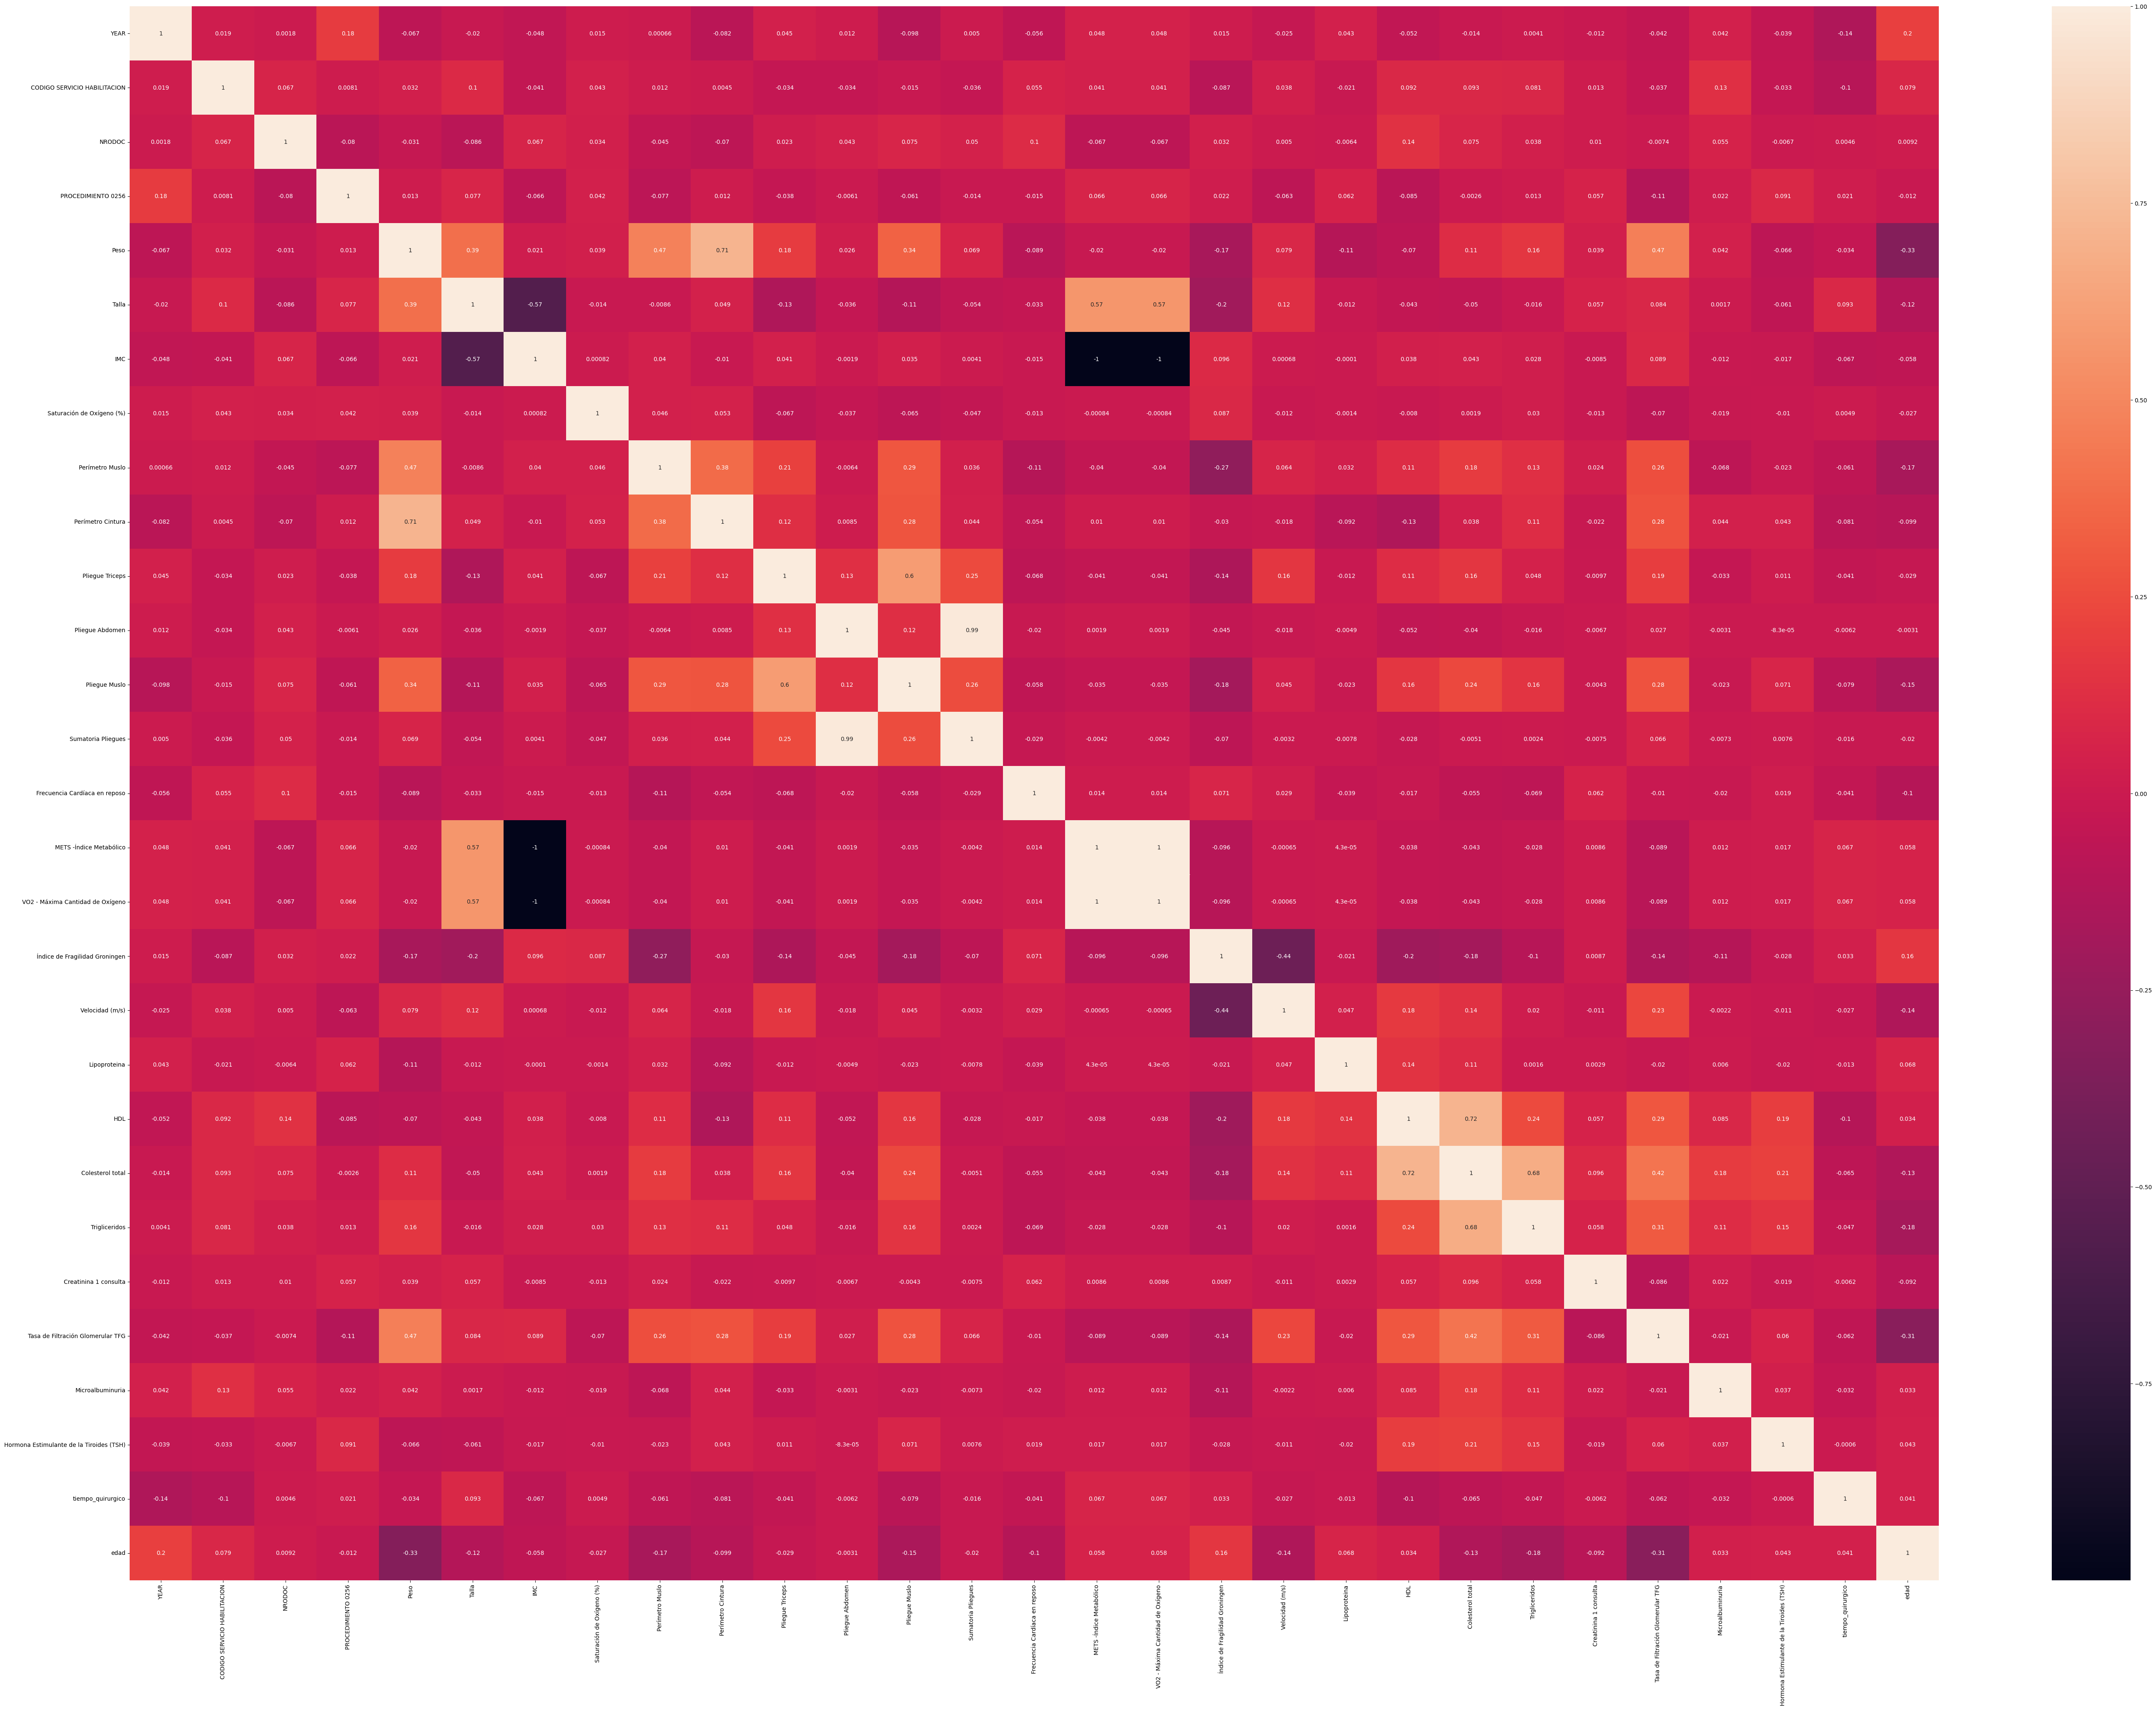

In [ ]:
# para interpretar mejor las correlaciones se pueden usar gráficos
figure(figsize=(70, 50), dpi=100);
sns.heatmap(dfpre.corr(), annot = True);

Las que mas correlación tienen: IMc con el Peso y medidas corporales como el pligue del muslo, tricep y asi; el colesterol total y HDL

In [ ]:
# crear dataset
base = dfpre.groupby(['MES'])[['SERVICIO HABILITACION']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'SERVICIO HABILITACION', y='MES', color ='SERVICIO HABILITACION' , barmode = 'group', title= '<b>Cantidad de cirugias por mes prepandemia<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'SERVICIO HABILITACION',
    yaxis_title = 'MES', title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = dfpre.groupby(['SERVICIO HABILITACION'])[['MES']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'MES', y='SERVICIO HABILITACION', color ='MES' , barmode = 'group', title= '<b>Cantidad de cirugias por especialidad prepandemia<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'CANTIDAD',
    yaxis_title = 'SERVICIO HABILITACION', title_x = 0.5)

fig.show()

Text(0.5, 1.0, 'Conteo por sexo prepandemia')

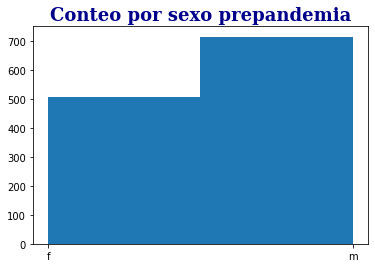

In [ ]:
# Histograma de conteo por SEXO
plt.hist(dfpre.SEXO,bins=2)
plt.title("Conteo por sexo prepandemia", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

In [ ]:
base = dfpre.groupby(['YEAR'])[['TRANSFUSION SANGRE']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'YEAR', y='TRANSFUSION SANGRE', color ='TRANSFUSION SANGRE' , barmode = 'group', title= '<b>Cantidad de transfusiones de sangre prepandemia<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = '',
    yaxis_title = 'TRANSFUSION SANGRE',
    template = 'simple_white',
    title_x = 0.5)
fig.show()
base = df.groupby(['YEAR'])[['TRANSFUSION SANGRE']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'YEAR', y='TRANSFUSION SANGRE', color ='TRANSFUSION SANGRE' , barmode = 'group', title= '<b>Cantidad de transfusiones de sangre postpandemia<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = '',
    yaxis_title = 'TRANSFUSION SANGRE',
    template = 'simple_white',
    title_x = 0.5)
fig.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



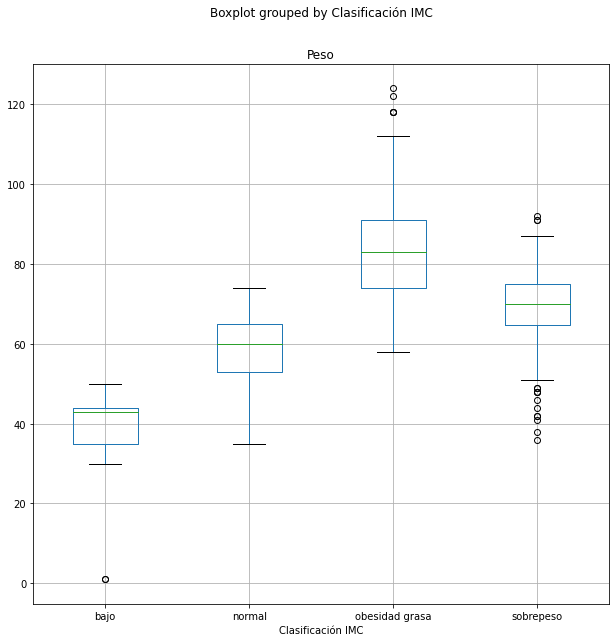

In [ ]:
##
dfpre.boxplot('Peso','Clasificación IMC',figsize=(10,10)) 

Postpandemia

In [ ]:
df

,YEAR,MES,CODIGO SERVICIO HABILITACION,SERVICIO HABILITACION,NRODOC,FECHA NACIMIENTO,TIPO PROCEDIMIENTO,ASA,TIPO DE ANESTESIA,VIA,...,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),TRANSFUSION SANGRE,ANTIBIOTICO,SEXO,CICLO_VITAL,entrada,salida,tiempo_quirurgico,edad
0,2021,noviembre,213,cirugia plastica y estetica,311666,1957-11-07,quirurgico,3electivo,general,unica via,...,1958.58,2.8,no,si,f,vejez,2021-11-30 14:48:00,2021-11-30 16:18:00,90.0,64
1,2021,diciembre,207,cirugia ortopedica,307349,1945-04-28,quirurgico,3urgente,raquidea,unica via,...,3.15,4.31,no,si,m,vejez,2021-12-11 23:51:00,2021-12-12 00:54:00,63.0,76
2,2021,diciembre,207,cirugia ortopedica,307349,1945-04-28,quirurgico,3urgente,raquidea,unica via,...,3.15,4.46,no,si,m,vejez,2021-12-11 23:51:00,2021-12-12 00:54:00,63.0,76
3,2021,diciembre,207,cirugia ortopedica,307349,1945-04-28,quirurgico,3urgente,raquidea,unica via,...,3.15,4.46,no,si,m,vejez,2021-12-11 23:51:00,2021-12-12 00:54:00,63.0,76
4,2021,diciembre,207,cirugia ortopedica,307349,1945-04-28,quirurgico,3urgente,raquidea,unica via,...,0.1,6.51,no,si,m,vejez,2021-12-11 23:51:00,2021-12-12 00:54:00,63.0,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8220,2022,abril,207,cirugia ortopedica,308651,1947-09-28,quirurgico,3electivo,raquidea,unica via,...,0.3,2.63,no,si,f,vejez,2022-04-18 07:38:00,2022-04-18 08:58:00,80.0,74
8221,2022,abril,207,cirugia ortopedica,308651,1947-09-28,quirurgico,3electivo,raquidea,unica via,...,6.16,3.63,no,si,f,vejez,2022-04-18 07:38:00,2022-04-18 08:58:00,80.0,74
8222,2022,abril,207,cirugia ortopedica,308651,1947-09-28,quirurgico,3electivo,raquidea,unica via,...,6.16,3.63,no,si,f,vejez,2022-04-18 07:38:00,2022-04-18 08:58:00,80.0,74
8223,2022,abril,207,cirugia ortopedica,308651,1947-09-28,quirurgico,3electivo,raquidea,unica via,...,6.16,3.63,no,si,f,vejez,2022-04-18 07:38:00,2022-04-18 08:58:00,80.0,74


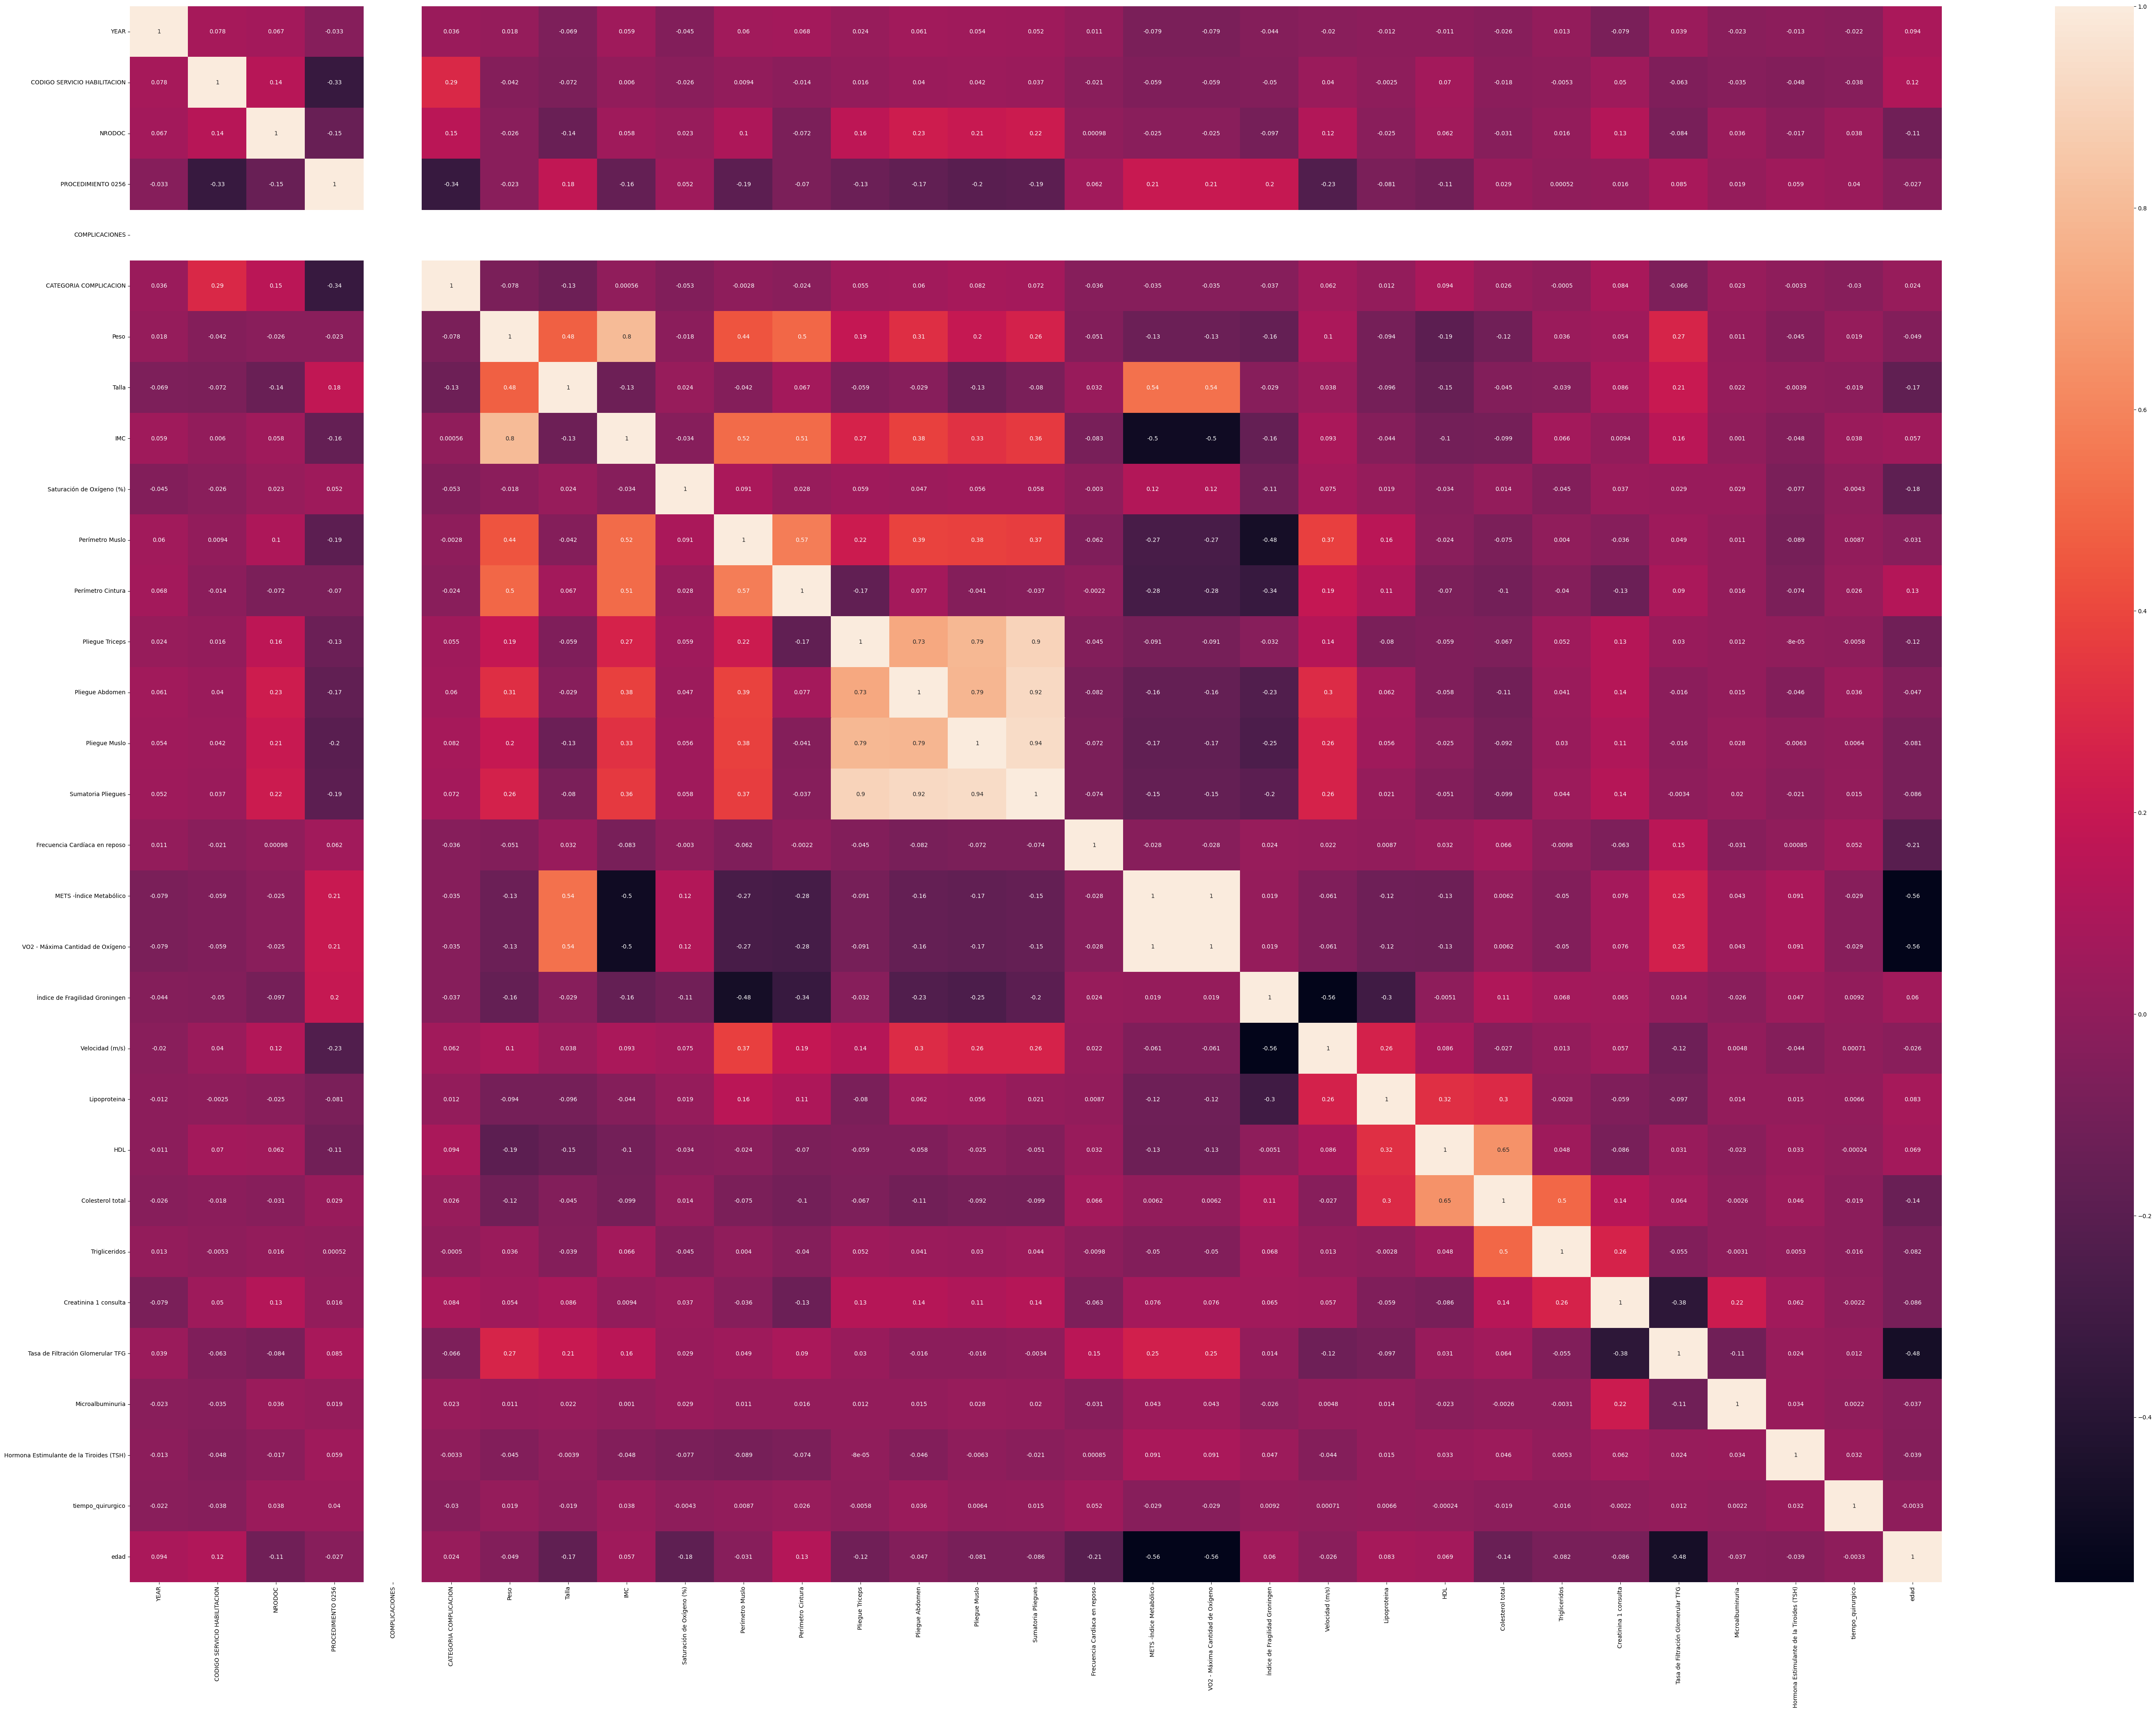

In [ ]:

# para interpretar mejor las correlaciones se pueden usar gráficos
figure(figsize=(70, 50), dpi=100);
sns.heatmap(df.corr(), annot = True);

Las que mas correlación tienen: IMc con el Peso y medidas corporales como el pligue del muslo, tricep y asi; el colesterol y HDL

In [ ]:
# crear dataset
base = df.groupby(['MES'])[['SERVICIO HABILITACION']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'SERVICIO HABILITACION', y='MES', color ='SERVICIO HABILITACION' , barmode = 'group', title= '<b>Cantidad de cirugias por mes<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'SERVICIO HABILITACION',
    yaxis_title = 'MES', title_x = 0.5)

fig.show()

In [ ]:
# crear dataset
base = df.groupby(['SERVICIO HABILITACION'])[['MES']].count().reset_index()

# crear gráfica
fig = px.bar(base, x = 'MES', y='SERVICIO HABILITACION', color ='MES' , barmode = 'group', title= '<b>Cantidad de cirugias por especialidad<b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'CANTIDAD',
    yaxis_title = 'SERVICIO HABILITACION', title_x = 0.5)

fig.show()

Text(0.5, 1.0, 'Conteo por sexo')

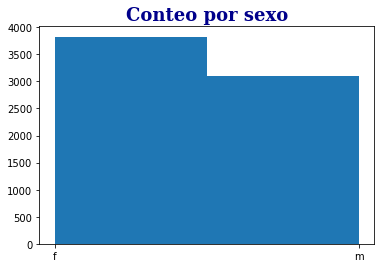

In [ ]:
# Histograma de conteo por SEXO
plt.hist(df.SEXO,bins=2)
plt.title("Conteo por sexo", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

Text(0.5, 1.0, 'Conteo por Ciclo vital')

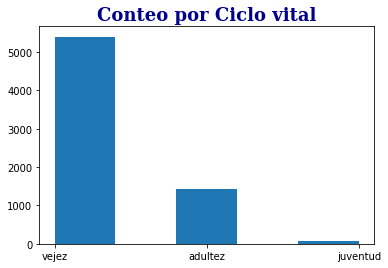

In [ ]:
plt.hist(df.CICLO_VITAL,bins=5)
plt.title("Conteo por Ciclo vital", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 18})

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



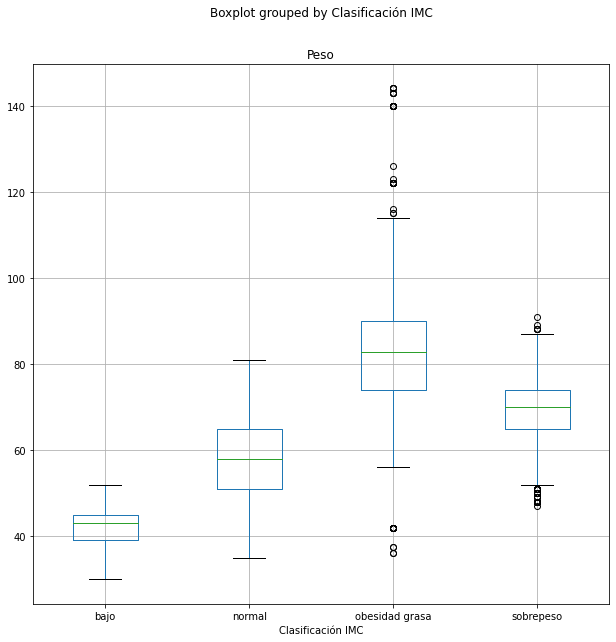

In [ ]:
##
df.boxplot('Peso','Clasificación IMC',figsize=(10,10)) 

# Feature Selection 

Prepandemia

In [ ]:
# se genera una copia del dataframe de prepandemia
dfpre2 = dfpre.copy(deep=True)

In [ ]:
#Se organizan valores 
dfpre2['Insuficiencia Cardíaca']= dfpre2['Insuficiencia Cardíaca'].replace(['no aplica'],'no')
dfpre2['Insuficiencia Cardíaca']= dfpre2['Insuficiencia Cardíaca'].replace(['controlada','no controlada','deterioro de c. funcional'],'si')
dfpre2['ESPECIALIDAD']= dfpre2['ESPECIALIDAD'].replace(['medicina del dolor y cuidado paleativo'],'medicina del dolor y cuidado paliativo')
dfpre2['ESPECIALIDAD']= dfpre2['ESPECIALIDAD'].replace(['cirugia plástica'],'cirugia plastica')

Convertir las variables string a numerica

In [ ]:
#Se pasa a valor numerico las variables categoricas de ASA, ESPECIALIDAD y COD DIAGNOSTICO PREQUIRURGICO	
# grouping by frequency especialidad
fq = dfpre2.groupby('ESPECIALIDAD').size()/len(dfpre2)
dfpre2.loc[:, "{}_codificado".format('ESPECIALIDAD')] = dfpre2['ESPECIALIDAD'].map(fq)
dfpre2 = dfpre2.drop(['ESPECIALIDAD'], axis = 1)
# grouping by frequency asa
fq = dfpre2.groupby('ASA').size()/len(dfpre2)
dfpre2.loc[:, "{}_codificado".format('ASA')] = dfpre2['ASA'].map(fq)
dfpre2 = dfpre2.drop(['ASA'], axis = 1)
# grouping by frequency COD DIAGNOSTICO PREQUIRURGICO	
fq = dfpre2.groupby('COD DIAGNOSTICO PREQUIRURGICO').size()/len(dfpre2)
dfpre2.loc[:, "{}_codificado".format('COD DIAGNOSTICO PREQUIRURGICO')] = dfpre2['COD DIAGNOSTICO PREQUIRURGICO'].map(fq)
dfpre2 = dfpre2.drop(['COD DIAGNOSTICO PREQUIRURGICO'], axis = 1)

In [ ]:
#Convertir la variable MES a numerica
dic = {'noviembre':11,'diciembre':12,'mayo':5,'octubre':10,'septiembre':9,'agosto':8,'julio':7,'marzo':3,'enero':1,'febrero':2,'junio':6,'abril':4}
dfpre2['MES'] = dfpre2['MES'].map(dic)
#Convertir la variable SEXO a numerica
dic = {'f':1,'m':0}
dfpre2['SEXO'] = dfpre2['SEXO'].map(dic)
#Convertir la variable TIPO DE ANESTESIA a numerica
dic = {'general':1,'raquidea':2,'bloqueo':3,'local asistida':4,'local':5,'ninguna':0,'sin informe quirurgico':6}
dfpre2['TIPO DE ANESTESIA'] = dfpre2['TIPO DE ANESTESIA'].map(dic)
#Convertir la variable tiene epoc a numerica
dic = {'sospecha':1,'si':2,'no':0}
dfpre2['Tiene EPOC'] = dfpre2['Tiene EPOC'].map(dic)
#Convertir la variable Tabaquismo a numerica
dic = {'no':0, 'si':1, 'ex-fumador':3}
dfpre2['Tabaquismo'] = dfpre2['Tabaquismo'].map(dic)
#Convertir la variable Sufre de alguna enfermedad cardiovascular a numerica
dic = {'no':0, 'si':1}
dfpre2['Sufre de alguna enfermedad cardiovascular'] = dfpre2['Sufre de alguna enfermedad cardiovascular'].map(dic)
#Convertir la variable transfision sangre a numerica
dic = {'no':0, 'si':1}
dfpre2['TRANSFUSION SANGRE'] = dfpre2['TRANSFUSION SANGRE'].map(dic)
#Convertir la variable antibiotico a numerica
dic = {'no':0, 'si':1}
dfpre2['ANTIBIOTICO'] = dfpre2['ANTIBIOTICO'].map(dic)
#Convertir la variable Arritmia o paciente con dispositivo a numerica
dic = {'no':0, 'si':1}
dfpre2['Arritmia o paciente con dispositivo'] = dfpre2['Arritmia o paciente con dispositivo'].map(dic)
#Convertir la variable Valvulopatía a numerica
dic = {'no':0, 'si':1}
dfpre2['Valvulopatía'] = dfpre2['Valvulopatía'].map(dic)
#Convertir la variable Insuficiencia Cardíaca a numerica
dic = {'no':0, 'si':1, 'signos de sobrecarga':1}
dfpre2['Insuficiencia Cardíaca'] = dfpre2['Insuficiencia Cardíaca'].map(dic)
#Convertir la variable Tiene HTA a numerica
dic = {'no':0, 'si':1}
dfpre2['Tiene HTA'] = dfpre2['Tiene HTA'].map(dic)
#Convertir la variable Diabetes Mellitus a numerica
dic = {'no':0, 'si':1}
dfpre2['Diabetes Mellitus'] = dfpre2['Diabetes Mellitus'].map(dic)
#Convertir la variable Calificación Velocidad a numerica
dic = {'deficiente':1, 'aceptable':3, 'malo - frágil':2, 'bueno':4}
dfpre2['Calificación Velocidad'] = dfpre2['Calificación Velocidad'].map(dic)
#Convertir la variable Calificación (Índice de Fragilidad) a numerica
dic = {'normal':1, 'frágil':0}
dfpre2['Calificación (Índice de Fragilidad)'] = dfpre2['Calificación (Índice de Fragilidad)'].map(dic)
dfpre2.drop(['NRODOC','SERVICIO HABILITACION','DESCRIPCION PREQUIRURGICO','NOMBRE CAPITULO','FECHA NACIMIENTO','entrada','salida','Clasificación IMC','Enfermedad Coronaria (En el último año)'],axis=1,inplace=True)

In [ ]:
#Se organizan los datos para que la ultima columna sea el target, en este caso el dia
dfpre2 = dfpre2[['YEAR', 'MES', 'CODIGO SERVICIO HABILITACION', 'TIPO DE ANESTESIA', 'PROCEDIMIENTO 0256', 'Peso',
       'Talla', 'IMC', 'Saturación de Oxígeno (%)', 'Perímetro Muslo',
       'Perímetro Cintura', 'Pliegue Triceps', 'Pliegue Abdomen',
       'Pliegue Muslo', 'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Tiene EPOC', 'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Creatinina 1 consulta', 'Tasa de Filtración Glomerular TFG',
       'Microalbuminuria', 'Hormona Estimulante de la Tiroides (TSH)',
       'TRANSFUSION SANGRE', 'ANTIBIOTICO', 'SEXO',
       'edad', 'ESPECIALIDAD_codificado', 'ASA_codificado',
       'COD DIAGNOSTICO PREQUIRURGICO_codificado','tiempo_quirurgico']]

In [ ]:
#Separacion variables de entrada y target
arreglo = dfpre2.values
X = arreglo[:,:45]
Y = arreglo[:,45]
Y=Y.astype(float)

In [ ]:
# Selecion del mejor, usaremos un k=20 para seleccionar las 20 mejores caracteristicas
prueba = SelectKBest(score_func=f_regression, k=20)
fit = prueba.fit(X,Y)

print(fit.scores_)
features = fit.transform(X)
print(features)

[2.45279440e+01 2.19787931e-02 1.24598056e+01 5.43641093e+00
 5.41874066e-01 1.44235185e+00 1.06127892e+01 5.43976334e+00
 2.89786300e-02 4.56043755e+00 8.03474523e+00 2.09817100e+00
 4.64556057e-02 7.64560237e+00 3.26399358e-01 2.05549402e+00
 5.44201618e+00 5.44201617e+00 1.31346933e+00 5.53185470e-01
 8.63033645e-01 2.14093821e+00 7.31760413e+00 1.94811291e+01
 4.19731774e-05 2.01394383e+00 6.16190664e-03 4.40570004e-03
 2.55106110e+00 7.09180467e-01 1.97856706e-01 1.33860874e+01
 5.10024706e+00 2.67632799e+00 4.66287300e-02 4.62874962e+00
 1.27420042e+00 4.44468234e-04 5.91029804e-01 4.27732300e-01
 4.44651059e+00 2.08213109e+00 1.23732834e+00 5.74630371e-01
 6.22112315e+00]
[[2017 206 1 ... 47.6 1 0.006562756357670222]
 [2017 206 1 ... 47.6 1 0.006562756357670222]
 [2017 206 1 ... 49.11 1 0.006562756357670222]
 ...
 [2018 207 1 ... 51.54 0 0.03281378178835111]
 [2018 214 1 ... 6.84 0 0.0016406890894175555]
 [2018 214 1 ... 6.71 0 0.0016406890894175555]]


In [ ]:
dfpre2.columns

Index(['YEAR', 'MES', 'CODIGO SERVICIO HABILITACION', 'TIPO DE ANESTESIA',
       'PROCEDIMIENTO 0256', 'Peso', 'Talla', 'IMC',
       'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura',
       'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo',
       'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Tiene EPOC', 'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Creatinina 1 consulta', 'Tasa de Filtración Glomerular TFG',
       'Microalbuminuria', 'Hormona Estimulante de la Tiroides (TSH)',
       'TRANSFUSION SANGRE', 'ANTIBIOTICO', 'SEXO', 'e

In [ ]:
names_f = fit.get_feature_names_out(input_features=['YEAR', 'MES', 'CODIGO SERVICIO HABILITACION',
       'TIPO DE ANESTESIA', 'PROCEDIMIENTO 0256', 'Peso', 'Talla', 'IMC',
       'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura',
       'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo',
       'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Tiene EPOC', 'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Creatinina 1 consulta', 'Tasa de Filtración Glomerular TFG',
       'Microalbuminuria', 'Hormona Estimulante de la Tiroides (TSH)',
       'TRANSFUSION SANGRE', 'ANTIBIOTICO', 'SEXO', 'edad',
       'ESPECIALIDAD_codificado', 'ASA_codificado',
       'COD DIAGNOSTICO PREQUIRURGICO_codificado'])
print(names_f)

['YEAR' 'CODIGO SERVICIO HABILITACION' 'TIPO DE ANESTESIA' 'Talla' 'IMC'
 'Perímetro Muslo' 'Perímetro Cintura' 'Pliegue Muslo'
 'METS -Índice Metabólico' 'VO2 - Máxima Cantidad de Oxígeno'
 'Calificación Velocidad' 'Diabetes Mellitus' 'Tiene HTA'
 'Sufre de alguna enfermedad cardiovascular' 'HDL' 'Colesterol total'
 'Trigliceridos' 'Tasa de Filtración Glomerular TFG' 'SEXO'
 'COD DIAGNOSTICO PREQUIRURGICO_codificado']


In [ ]:
# Selecion del mejor, usaremos un k=20 para seleccionar las 20 mejores caracteristicas
prueba = SelectKBest(score_func=mutual_info_regression, k=20)
fit = prueba.fit(X,Y)

print(fit.scores_)
features = fit.transform(X)
print(features)

[0.46529344 1.92801989 1.57333783 0.88849311 3.54482852 1.12905211
 2.3551016  1.94158161 0.53353868 0.91224131 1.08708747 0.44373632
 0.49515898 0.47208143 0.56425712 0.43287317 1.47823793 1.47913386
 0.33937077 0.11353795 0.26913873 0.10146985 0.49514844 0.09750592
 0.65123424 0.44994041 0.18225518 0.16538339 0.52581304 0.06195303
 2.313099   2.23922824 2.40463347 2.50657285 0.8088151  1.03091707
 1.98307119 1.52936197 0.146493   0.16682645 0.5177715  2.71858972
 1.6248319  1.32268114 2.63103359]
[[11 206 39301 ... 0.01804757998359311 0.28137817883511074
  0.006562756357670222]
 [11 206 39301 ... 0.01804757998359311 0.28137817883511074
  0.006562756357670222]
 [11 206 39301 ... 0.01804757998359311 0.28137817883511074
  0.006562756357670222]
 ...
 [9 207 793501 ... 0.2977850697292863 0.05824446267432322
  0.03281378178835111]
 [9 214 383801 ... 0.09351927809680066 0.18703855619360132
  0.0016406890894175555]
 [9 214 383801 ... 0.09351927809680066 0.18703855619360132
  0.00164068908941

In [ ]:
names_n = fit.get_feature_names_out(input_features=['YEAR', 'MES', 'CODIGO SERVICIO HABILITACION',
       'TIPO DE ANESTESIA', 'PROCEDIMIENTO 0256', 'Peso', 'Talla', 'IMC',
       'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura',
       'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo',
       'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Tiene EPOC', 'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Creatinina 1 consulta', 'Tasa de Filtración Glomerular TFG',
       'Microalbuminuria', 'Hormona Estimulante de la Tiroides (TSH)',
       'TRANSFUSION SANGRE', 'ANTIBIOTICO', 'SEXO', 'edad',
       'ESPECIALIDAD_codificado', 'ASA_codificado',
       'COD DIAGNOSTICO PREQUIRURGICO_codificado'])
print(names_n)

['MES' 'CODIGO SERVICIO HABILITACION' 'PROCEDIMIENTO 0256' 'Peso' 'Talla'
 'IMC' 'Perímetro Cintura' 'METS -Índice Metabólico'
 'VO2 - Máxima Cantidad de Oxígeno' 'Lipoproteina' 'HDL'
 'Colesterol total' 'Trigliceridos' 'Tasa de Filtración Glomerular TFG'
 'Microalbuminuria' 'Hormona Estimulante de la Tiroides (TSH)' 'edad'
 'ESPECIALIDAD_codificado' 'ASA_codificado'
 'COD DIAGNOSTICO PREQUIRURGICO_codificado']


Se decide utilizar las variables que arroja el KBEST utilizando el mutual_info_regression

Feature Selection postpandemia:

In [ ]:
# Se genera una copia del dataframe post pandemia
df2 = df.copy(deep=True)

In [ ]:
df2['Insuficiencia Cardíaca']= df2['Insuficiencia Cardíaca'].replace(['no aplica'],'no')
df2['Insuficiencia Cardíaca']= df2['Insuficiencia Cardíaca'].replace(['controlada','no controlada','deterioro de c. funcional'],'si')
df2['ESPECIALIDAD']= df2['ESPECIALIDAD'].replace(['medicina del dolor y cuidado paleativo'],'medicina del dolor y cuidado paliativo')
df2['ESPECIALIDAD']= df2['ESPECIALIDAD'].replace(['cirugia plástica'],'cirugia plastica')

In [ ]:
#Se Elimina transfusion de sangre y antiobiotico, porque casi la mitad de sus datos son nulos
df2.drop(['entrada','salida','FECHA NACIMIENTO','TRANSFUSION SANGRE','ANTIBIOTICO','YEAR','NRODOC','SERVICIO HABILITACION','DESCRIPCION PREQUIRURGICO',
          'NOMBRE CAPITULO','COMPLICACIONES','CICLO_VITAL','Enfermedad Coronaria (En el último año)','Tiene EPOC','Clasificación IMC'],axis=1,inplace=True)

In [ ]:
#Se eliminan los nulos que son menores al 20% de los datos totales
#Se eliminan los nulos de la variable target "tiempo quirurgico", saturacion de oxigeno, complicaciones, dado que son pocos los nulos respecto a la cantidad de datos
df2 = df2.dropna(subset=['tiempo_quirurgico','Saturación de Oxígeno (%)','ASA','TIPO DE ANESTESIA'])

Convertir las variables string a numerica

In [ ]:
#Se pasa a valor numerico las variables categoricas de ASA, ESPECIALIDAD y COD DIAGNOSTICO PREQUIRURGICO	
# grouping by frequency especialidad
fq = df2.groupby('ESPECIALIDAD').size()/len(df2)
df2.loc[:, "{}_codificado".format('ESPECIALIDAD')] = df2['ESPECIALIDAD'].map(fq)
df2 = df2.drop(['ESPECIALIDAD'], axis = 1)
# grouping by frequency asa
fq = df2.groupby('ASA').size()/len(df2)
df2.loc[:, "{}_codificado".format('ASA')] = df2['ASA'].map(fq)
df2 = df2.drop(['ASA'], axis = 1)
# grouping by frequency COD DIAGNOSTICO PREQUIRURGICO	
fq = df2.groupby('COD DIAGNOSTICO PREQUIRURGICO').size()/len(df2)
df2.loc[:, "{}_codificado".format('COD DIAGNOSTICO PREQUIRURGICO')] = df2['COD DIAGNOSTICO PREQUIRURGICO'].map(fq)
df2 = df2.drop(['COD DIAGNOSTICO PREQUIRURGICO'], axis = 1)

In [ ]:
#Convertir la variable MES a numerica
dic = {'noviembre':11,'diciembre':12,'mayo':5,'octubre':10,'septiembre':9,'agosto':8,'julio':7,'marzo':3,'enero':1,'febrero':2,'junio':6,'abril':4}
df2['MES'] = df2['MES'].map(dic)
#Convertir la variable TIPO PROCEDIMIENTO a numerica
dic = {'quirurgico':1,'no quirurgico':0}
df2['TIPO PROCEDIMIENTO'] = df2['TIPO PROCEDIMIENTO'].map(dic)
#Convertir la variable SEXO a numerica
dic = {'f':1,'m':0}
df2['SEXO'] = df2['SEXO'].map(dic)
#Convertir la variable TIPO DE ANESTESIA a numerica
dic = {'general':1,'raquidea':2,'bloqueo':3,'local asistida':4,'local':5,'ninguna':0,'epidural':6}
df2['TIPO DE ANESTESIA'] = df2['TIPO DE ANESTESIA'].map(dic)
#Convertir la variable Clasificación de Framinghan a numerica
dic = {'alto riesgo':1, 'bajo riesgo':0}
df2['Clasificación de Framinghan'] = df2['Clasificación de Framinghan'].map(dic)
#Convertir la variable Tabaquismo a numerica
dic = {'no':0, 'si':1, 'ex-fumador':3}
df2['Tabaquismo'] = df2['Tabaquismo'].map(dic)
#Convertir la variable Sufre de alguna enfermedad cardiovascular a numerica
dic = {'no':0, 'si':1}
df2['Sufre de alguna enfermedad cardiovascular'] = df2['Sufre de alguna enfermedad cardiovascular'].map(dic)
#Convertir la variable Arritmia o paciente con dispositivo a numerica
dic = {'no':0, 'si':1}
df2['Arritmia o paciente con dispositivo'] = df2['Arritmia o paciente con dispositivo'].map(dic)
#Convertir la variable Valvulopatía a numerica
dic = {'no':0, 'si':1}
df2['Valvulopatía'] = df2['Valvulopatía'].map(dic)
#Convertir la variable Insuficiencia Cardíaca a numerica
dic = {'no':0, 'si':1}
df2['Insuficiencia Cardíaca'] = df2['Insuficiencia Cardíaca'].map(dic)
#Convertir la variable Tiene HTA a numerica
dic = {'no':0, 'si':1}
df2['Tiene HTA'] = df2['Tiene HTA'].map(dic)
#Convertir la variable Diabetes Mellitus a numerica
dic = {'no':0, 'si':1}
df2['Diabetes Mellitus'] = df2['Diabetes Mellitus'].map(dic)
#Convertir la variable Calificación Velocidad a numerica
dic = {'deficiente':1, 'aceptable':3, 'malo - frágil':2, 'bueno':4}
df2['Calificación Velocidad'] = df2['Calificación Velocidad'].map(dic)
#Convertir la variable Calificación (Índice de Fragilidad) a numerica
dic = {'normal':1, 'frágil':0}
df2['Calificación (Índice de Fragilidad)'] = df2['Calificación (Índice de Fragilidad)'].map(dic)
#Convertir la variable VIA a numerica
dic = {'unica via':1,'multiple procedimiento mismo especialista diferente via':2,'multiple procedimiento mismo especialista igual via':3,'bilateral':4,'multiple procedimiento diferente especialista diferente via':5}
df2['VIA'] = df2['VIA'].map(dic)

df2

,MES,CODIGO SERVICIO HABILITACION,TIPO PROCEDIMIENTO,TIPO DE ANESTESIA,VIA,PROCEDIMIENTO 0256,CATEGORIA COMPLICACION,Peso,Talla,IMC,...,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),SEXO,tiempo_quirurgico,edad,ESPECIALIDAD_codificado,ASA_codificado,COD DIAGNOSTICO PREQUIRURGICO_codificado
0,11,213,1,1,1,862008,3,77.0,158,30.84,...,11.77,5.95,1958.58,2.8,1,90.0,64,0.089306,0.432239,0.003349
1,12,207,1,2,1,770701,3,73.0,161,28.16,...,0.69,94.04,3.15,4.31,0,63.0,76,0.404331,0.214110,0.003349
2,12,207,1,2,1,770701,3,84.0,162,32.01,...,0.0,0.0,3.15,4.46,0,63.0,76,0.404331,0.214110,0.003349
3,12,207,1,2,1,770701,3,79.0,162,30.1,...,0.8,87.78,3.15,4.46,0,63.0,76,0.404331,0.214110,0.003349
4,12,207,1,2,1,770701,3,77.0,162,29.34,...,0.76,88.65,0.1,6.51,0,63.0,76,0.404331,0.214110,0.003349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8220,4,207,1,2,1,770920,3,58.0,155,24.14,...,0.38,120.73,0.3,2.63,1,80.0,74,0.404331,0.432239,0.043983
8221,4,207,1,2,1,770920,3,45.0,150,20.0,...,0.23,152.45,6.16,3.63,1,80.0,74,0.404331,0.432239,0.043983
8222,4,207,1,2,1,770920,3,55.0,150,24.44,...,0.52,82.41,6.16,3.63,1,80.0,74,0.404331,0.432239,0.043983
8223,4,207,1,2,1,770920,3,55.0,150,24.44,...,0.52,82.41,6.16,3.63,1,80.0,74,0.404331,0.432239,0.043983


In [ ]:
#Se organizan los datos para que la ultima columna sea el target, en este caso el dia
df2 = df2[['MES', 'CODIGO SERVICIO HABILITACION', 'TIPO PROCEDIMIENTO',
       'TIPO DE ANESTESIA', 'VIA', 'PROCEDIMIENTO 0256',
       'CATEGORIA COMPLICACION', 'Peso', 'Talla', 'IMC',
       'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura',
       'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo',
       'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Clasificación de Framinghan', 'Creatinina 1 consulta',
       'Tasa de Filtración Glomerular TFG', 'Microalbuminuria',
       'Hormona Estimulante de la Tiroides (TSH)', 'SEXO',
       'edad', 'ESPECIALIDAD_codificado', 'ASA_codificado',
       'COD DIAGNOSTICO PREQUIRURGICO_codificado', 'tiempo_quirurgico']]

df2

,MES,CODIGO SERVICIO HABILITACION,TIPO PROCEDIMIENTO,TIPO DE ANESTESIA,VIA,PROCEDIMIENTO 0256,CATEGORIA COMPLICACION,Peso,Talla,IMC,...,Creatinina 1 consulta,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),SEXO,edad,ESPECIALIDAD_codificado,ASA_codificado,COD DIAGNOSTICO PREQUIRURGICO_codificado,tiempo_quirurgico
0,11,213,1,1,1,862008,3,77.0,158,30.84,...,11.77,5.95,1958.58,2.8,1,64,0.089306,0.432239,0.003349,90.0
1,12,207,1,2,1,770701,3,73.0,161,28.16,...,0.69,94.04,3.15,4.31,0,76,0.404331,0.214110,0.003349,63.0
2,12,207,1,2,1,770701,3,84.0,162,32.01,...,0.0,0.0,3.15,4.46,0,76,0.404331,0.214110,0.003349,63.0
3,12,207,1,2,1,770701,3,79.0,162,30.1,...,0.8,87.78,3.15,4.46,0,76,0.404331,0.214110,0.003349,63.0
4,12,207,1,2,1,770701,3,77.0,162,29.34,...,0.76,88.65,0.1,6.51,0,76,0.404331,0.214110,0.003349,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8220,4,207,1,2,1,770920,3,58.0,155,24.14,...,0.38,120.73,0.3,2.63,1,74,0.404331,0.432239,0.043983,80.0
8221,4,207,1,2,1,770920,3,45.0,150,20.0,...,0.23,152.45,6.16,3.63,1,74,0.404331,0.432239,0.043983,80.0
8222,4,207,1,2,1,770920,3,55.0,150,24.44,...,0.52,82.41,6.16,3.63,1,74,0.404331,0.432239,0.043983,80.0
8223,4,207,1,2,1,770920,3,55.0,150,24.44,...,0.52,82.41,6.16,3.63,1,74,0.404331,0.432239,0.043983,80.0


In [ ]:
#Separacion variables de entrada y target
arreglo = df2.values
X = arreglo[:,:45]
Y = arreglo[:,45]
X = X.astype(float)
Y = Y.astype(float)

In [ ]:
# Selecion del mejor, usaremos un k=20 para seleccionar las 20 mejores caracteristicas
prueba = SelectKBest(score_func=f_regression , k=20)
fit = prueba.fit(X,Y)

print(fit.scores_)
features = fit.transform(X)
print(features)

[5.65748137e-01 3.84396936e+00 2.84479042e-01 4.65995674e+00
 2.46801401e+00 3.31109838e+00 3.19480217e+00 2.56008997e+00
 4.19675222e+00 1.28611608e+01 2.86882202e-01 1.39291776e+00
 4.92086693e+00 1.91818469e-02 1.11704785e+01 1.13272520e+00
 2.92436575e+00 1.65448673e+01 1.10218897e+01 1.10218859e+01
 7.84974706e-02 2.54301535e-01 2.84802864e-01 1.67123247e+00
 6.94906100e+00 5.38044974e+00 9.08975907e-02 6.71238200e+01
 3.94084772e-01 4.99832275e+00 2.86695124e+00 4.02151075e-01
 7.49215910e-02 2.83951065e+00 1.87562811e+00 9.45375174e+00
 1.06384444e-01 4.34873686e-01 1.54465722e-03 4.95972567e+00
 2.50822726e+00 1.02798374e-01 9.79011447e-01 3.25507482e+00
 7.05354191e+00]
[[2.13000000e+02 1.00000000e+00 8.62008000e+05 ... 2.80000000e+00
  4.32239339e-01 3.34896182e-03]
 [2.07000000e+02 2.00000000e+00 7.70701000e+05 ... 4.31000000e+00
  2.14110292e-01 3.34896182e-03]
 [2.07000000e+02 2.00000000e+00 7.70701000e+05 ... 4.46000000e+00
  2.14110292e-01 3.34896182e-03]
 ...
 [2.070000

In [ ]:
names_f = fit.get_feature_names_out(input_features=['MES', 'CODIGO SERVICIO HABILITACION', 'TIPO PROCEDIMIENTO',
       'TIPO DE ANESTESIA', 'VIA', 'PROCEDIMIENTO 0256',
       'CATEGORIA COMPLICACION', 'Peso', 'Talla', 'IMC',
       'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura',
       'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo',
       'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Clasificación de Framinghan', 'Creatinina 1 consulta',
       'Tasa de Filtración Glomerular TFG', 'Microalbuminuria',
       'Hormona Estimulante de la Tiroides (TSH)', 'SEXO', 'edad',
       'ESPECIALIDAD_codificado', 'ASA_codificado',
       'COD DIAGNOSTICO PREQUIRURGICO_codificado'])
print(names_f)

['CODIGO SERVICIO HABILITACION' 'TIPO DE ANESTESIA' 'PROCEDIMIENTO 0256'
 'CATEGORIA COMPLICACION' 'Talla' 'IMC' 'Perímetro Cintura'
 'Pliegue Abdomen' 'Sumatoria Pliegues' 'Frecuencia Cardíaca en reposo'
 'METS -Índice Metabólico' 'VO2 - Máxima Cantidad de Oxígeno'
 'Diabetes Mellitus' 'Tiene HTA' 'Valvulopatía'
 'Sufre de alguna enfermedad cardiovascular' 'Clasificación de Framinghan'
 'Hormona Estimulante de la Tiroides (TSH)' 'ASA_codificado'
 'COD DIAGNOSTICO PREQUIRURGICO_codificado']


In [ ]:
# Selecion del mejor, usaremos un k=20 para seleccionar las 20 mejores caracteristicas
prueba = SelectKBest(score_func=mutual_info_regression, k=20)
fit = prueba.fit(X,Y)

print(fit.scores_)
features = fit.transform(X)
print(features)

[1.35519841 1.03656801 0.04594948 0.67768184 0.42947835 3.20387431
 0.27213143 1.14904567 1.02248717 1.65884817 0.2526572  1.02967849
 1.18485906 0.76752464 0.78338912 0.76216051 1.04348596 0.34964616
 0.73062281 0.73502245 0.58586804 0.14458465 0.36322518 0.18970362
 0.25140619 0.19670211 0.22224052 0.13797383 0.10222189 0.25179994
 0.27113779 1.07315661 2.04535313 2.04508314 2.08317734 0.17351867
 1.15653251 1.18769829 1.83542812 2.12768314 0.24160576 2.3937899
 1.03108252 0.75445614 2.55829849]
[[1.10000000e+01 2.13000000e+02 8.62008000e+05 ... 6.40000000e+01
  8.93056486e-02 3.34896182e-03]
 [1.20000000e+01 2.07000000e+02 7.70701000e+05 ... 7.60000000e+01
  4.04331324e-01 3.34896182e-03]
 [1.20000000e+01 2.07000000e+02 7.70701000e+05 ... 7.60000000e+01
  4.04331324e-01 3.34896182e-03]
 ...
 [4.00000000e+00 2.07000000e+02 7.70920000e+05 ... 7.40000000e+01
  4.04331324e-01 4.39830319e-02]
 [4.00000000e+00 2.07000000e+02 7.70920000e+05 ... 7.40000000e+01
  4.04331324e-01 4.39830319e-0

In [ ]:
names_m = fit.get_feature_names_out(input_features=['MES', 'CODIGO SERVICIO HABILITACION', 'TIPO PROCEDIMIENTO',
       'TIPO DE ANESTESIA', 'VIA', 'PROCEDIMIENTO 0256',
       'CATEGORIA COMPLICACION', 'Peso', 'Talla', 'IMC',
       'Saturación de Oxígeno (%)', 'Perímetro Muslo', 'Perímetro Cintura',
       'Pliegue Triceps', 'Pliegue Abdomen', 'Pliegue Muslo',
       'Sumatoria Pliegues', 'Frecuencia Cardíaca en reposo',
       'METS -Índice Metabólico', 'VO2 - Máxima Cantidad de Oxígeno',
       'Índice de Fragilidad Groningen', 'Calificación (Índice de Fragilidad)',
       'Velocidad (m/s)', 'Calificación Velocidad', 'Diabetes Mellitus',
       'Tiene HTA', 'Insuficiencia Cardíaca', 'Valvulopatía',
       'Arritmia o paciente con dispositivo',
       'Sufre de alguna enfermedad cardiovascular', 'Tabaquismo',
       'Lipoproteina', 'HDL', 'Colesterol total', 'Trigliceridos',
       'Clasificación de Framinghan', 'Creatinina 1 consulta',
       'Tasa de Filtración Glomerular TFG', 'Microalbuminuria',
       'Hormona Estimulante de la Tiroides (TSH)', 'SEXO', 'edad',
       'ESPECIALIDAD_codificado', 'ASA_codificado',
       'COD DIAGNOSTICO PREQUIRURGICO_codificado'])
print(names_m)

['MES' 'CODIGO SERVICIO HABILITACION' 'PROCEDIMIENTO 0256' 'Peso' 'Talla'
 'IMC' 'Perímetro Muslo' 'Perímetro Cintura' 'Sumatoria Pliegues'
 'Lipoproteina' 'HDL' 'Colesterol total' 'Trigliceridos'
 'Creatinina 1 consulta' 'Tasa de Filtración Glomerular TFG'
 'Microalbuminuria' 'Hormona Estimulante de la Tiroides (TSH)' 'edad'
 'ESPECIALIDAD_codificado' 'COD DIAGNOSTICO PREQUIRURGICO_codificado']


Se decide utilizar las variables que arroja el KBEST utilizando el f_regression

# Evaluación de desempeño

Evaluación prepandemia

In [ ]:
names_n = list(names_n)
names_n.append('tiempo_quirurgico')

In [ ]:
dfpre3 = pd.DataFrame(dfpre2,columns = names_n)
dfpre3

,MES,CODIGO SERVICIO HABILITACION,PROCEDIMIENTO 0256,Peso,Talla,IMC,Perímetro Cintura,METS -Índice Metabólico,VO2 - Máxima Cantidad de Oxígeno,Lipoproteina,...,Colesterol total,Trigliceridos,Tasa de Filtración Glomerular TFG,Microalbuminuria,Hormona Estimulante de la Tiroides (TSH),edad,ESPECIALIDAD_codificado,ASA_codificado,COD DIAGNOSTICO PREQUIRURGICO_codificado,tiempo_quirurgico
6,11,206,39301,63.0,150.0,28.0,66,3.81,13.335,89.0,...,175.0,195.0,47.6,0.58,0.0,75.0,0.018048,0.281378,0.006563,222.683333
8,11,206,39301,63.0,150.0,28.0,66,3.81,13.335,89.0,...,175.0,195.0,47.6,0.58,0.0,75.0,0.018048,0.281378,0.006563,222.683333
10,11,206,39301,65.0,151.0,28.51,94,3.1633,11.0715,89.0,...,175.0,195.0,49.11,0.58,0.0,75.0,0.018048,0.281378,0.006563,222.683333
12,11,206,39301,65.0,151.0,28.51,94,3.1633,11.0715,89.0,...,175.0,195.0,49.11,0.58,0.0,75.0,0.018048,0.281378,0.006563,222.683333
14,11,206,39301,63.0,150.0,28.0,97,4.11,14.385,89.0,...,175.0,195.0,59.5,0.58,0.0,75.0,0.018048,0.281378,0.006563,222.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6140,9,207,834930,67.0,163.0,25.22,103,5.1526,18.0341,116.0,...,179.0,143.0,39.55,8.18,0.0,90.0,0.297785,0.187039,0.020509,159.466667
6142,9,207,793501,61.0,162.0,23.24,104,7.0292,24.6022,0.0,...,0.0,0.0,0.0,0.0,0.0,81.0,0.297785,0.058244,0.032814,130.733333
6143,9,207,793501,74.0,162.0,28.2,109,5.926,20.741,106.77,...,192.0,243.0,51.54,98.0,0.0,81.0,0.297785,0.058244,0.032814,130.733333
6178,9,214,383801,51.0,162.0,19.43,77,9.7469,34.1142,108.97,...,168.8,99.3,6.84,0.0,0.0,56.0,0.093519,0.187039,0.001641,149.583333


In [ ]:
arreglo = dfpre3.values
X = arreglo[:,0:20]
y = arreglo[:,20]
y=y.astype(int)

In [ ]:
#Asignación de valores de entrenamiento y de prueba.
pPruebas = 0.33
semilla = 3
X_trainpre, X_testpre, y_trainpre, y_testpre = train_test_split(X,y,test_size=pPruebas, random_state=semilla)

modelo = LogisticRegression(solver='liblinear',max_iter=5000)

modelo.fit(X_trainpre, y_trainpre)

resultado1 = modelo.score(X_testpre, y_testpre)

print("Precisión: ",resultado1*100)

Precisión:  29.03225806451613


In [ ]:
#k-fold Cross-Validation
kfold = KFold(n_splits=5, random_state=5, shuffle=True)

modelo = LogisticRegression(solver='liblinear',max_iter=5000)

resultado2 = cross_val_score(modelo, X, y, cv=kfold)

print("Precisión: ",resultado2.mean()*100)

Precisión:  33.87742022532551


In [ ]:
#Entrenamiento aleatorio repetido
pPruebas = 0.33
splits = 5
semilla = 6
kfold = ShuffleSplit(n_splits=splits, test_size=pPruebas, random_state=semilla)
modelo = LogisticRegression(solver='liblinear',max_iter=5000)

resultado4 = cross_val_score(modelo, X, y, cv=kfold)

#puntaje
print("Precisión: ",resultado4.mean()*100)

Precisión:  32.95285359801488


In [ ]:
#Tabla resumen de metricas de precision
tabla = pd.DataFrame()
nombre = ['Train and Test Sets','k-fold Cross-Validation','Repeated Random Test-Train Splits']
Precision = [resultado1*100,resultado2.mean()*100,resultado4.mean()*100]
tabla['Evaluador de desempeño'] = nombre
tabla['Precision'] = Precision

tabla

,Evaluador de desempeño,Precision
0,Train and Test Sets,29.032258
1,k-fold Cross-Validation,33.877420
2,Repeated Random Test-Train Splits,32.952854


Evaluación postpandemia

In [ ]:
names_f = list(names_f)
names_f.append('tiempo_quirurgico')

In [ ]:
df3 = pd.DataFrame(df2,columns = names_f)
df3

,CODIGO SERVICIO HABILITACION,TIPO DE ANESTESIA,PROCEDIMIENTO 0256,CATEGORIA COMPLICACION,Talla,IMC,Perímetro Cintura,Pliegue Abdomen,Sumatoria Pliegues,Frecuencia Cardíaca en reposo,...,VO2 - Máxima Cantidad de Oxígeno,Diabetes Mellitus,Tiene HTA,Valvulopatía,Sufre de alguna enfermedad cardiovascular,Clasificación de Framinghan,Hormona Estimulante de la Tiroides (TSH),ASA_codificado,COD DIAGNOSTICO PREQUIRURGICO_codificado,tiempo_quirurgico
0,213,1,862008,3,158,30.84,103,34,97,88,...,13.6052,1,1,0,1,1,2.8,0.432239,0.003349,90.0
1,207,2,770701,3,161,28.16,113,8,18,72,...,22.0248,1,1,0,1,1,4.31,0.214110,0.003349,63.0
2,207,2,770701,3,162,32.01,118,13,42,74,...,19.874,1,1,0,1,1,4.46,0.214110,0.003349,63.0
3,207,2,770701,3,162,30.1,115,15,65,70,...,21.0805,1,1,0,1,1,4.46,0.214110,0.003349,63.0
4,207,2,770701,3,162,29.34,111,10,24,66,...,21.6027,1,1,0,1,1,6.51,0.214110,0.003349,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8220,207,2,770920,3,155,24.14,92,10,31,74,...,15.9117,0,0,0,0,1,2.63,0.432239,0.043983,80.0
8221,207,2,770920,3,150,20.0,92,3,14,95,...,15.47,0,0,0,0,1,3.63,0.432239,0.043983,80.0
8222,207,2,770920,3,150,24.44,92,3,14,76,...,14.8232,0,0,0,0,1,3.63,0.432239,0.043983,80.0
8223,207,2,770920,3,150,24.44,92,3,14,90,...,13.3532,0,0,0,0,1,3.63,0.432239,0.043983,80.0


In [ ]:
arreglo = df3.values
X = arreglo[:,0:20]
y = arreglo[:,20]
y=y.astype(float)

In [ ]:
#Asignación de valores de entrenamiento y de prueba.
pPruebas = 0.33
semilla = 3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=pPruebas, random_state=semilla)

modelo = LogisticRegression(solver='liblinear')

modelo.fit(X_train, y_train)

resultado1 = modelo.score(X_test, y_test)

print("Precisión: ",resultado1*100)

Precisión:  6.896551724137931


In [ ]:
#k-fold Cross-Validation
kfold = KFold(n_splits=5, random_state=5, shuffle=True)

modelo = LogisticRegression(solver='liblinear')

resultado2 = cross_val_score(modelo, X, y, cv=kfold)

print("Precisión: ",resultado2.mean()*100)

Precisión:  6.720371109337591


In [ ]:
#Entrenamiento aleatorio repetido
pPruebas = 0.33
splits = 5
semilla = 6
kfold = ShuffleSplit(n_splits=splits, test_size=pPruebas, random_state=semilla)
modelo = LogisticRegression(solver='liblinear')

resultado4 = cross_val_score(modelo, X, y, cv=kfold)

#puntaje
print("Precisión: ",resultado4.mean()*100)

Precisión:  6.572008113590264


In [ ]:
#Tabla resumen de metricas de precision
tabla = pd.DataFrame()
nombre = ['Train and Test Sets','k-fold Cross-Validation','Repeated Random Test-Train Splits']
Precision = [resultado1*100,resultado2.mean()*100,resultado4.mean()*100]
tabla['Evaluador de desempeño'] = nombre
tabla['Precision'] = Precision

tabla

,Evaluador de desempeño,Precision
0,Train and Test Sets,6.896552
1,k-fold Cross-Validation,6.720371
2,Repeated Random Test-Train Splits,6.572008


# Modelo

pre pandemia

KNN

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_trainpre, y_trainpre)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
train_preds = knn_model.predict(X_trainpre)
mse = mean_squared_error(y_trainpre, train_preds)
print("RMSE de entrenamiento:","",sqrt(mse))
print("Precisión de entrenemiento:","",r2_score(y_trainpre, train_preds))

test_preds = knn_model.predict(X_testpre)
mse = mean_squared_error(y_testpre, test_preds)
print("RMSE de test:","",sqrt(mse))
print("Precisión de test:","",r2_score(y_testpre, test_preds))

RMSE de entrenamiento:  251.46559106821232
Precisión de entrenemiento:  0.911731451248972
RMSE de test:  479.5525640676812
Precisión de test:  0.7267238485353187


Ajuste Hiperparámetros

In [ ]:
parameters = {"n_neighbors": range(1, 50),'weights': ['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'metric':['minkowski','cosine','euclidean']}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_trainpre, y_trainpre)


In [ ]:
gridsearch.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 1,
 'weights': 'uniform'}

In [ ]:
train_preds_grid = gridsearch.predict(X_trainpre)
train_mse = mean_squared_error(y_trainpre, train_preds_grid)
train_rmse = sqrt(train_mse)
print("Precisión de entrenemiento:","",r2_score(y_trainpre, train_preds_grid))

test_preds_grid = gridsearch.predict(X_testpre)
test_mse = mean_squared_error(y_testpre, test_preds_grid)
test_rmse = sqrt(test_mse)
print("Precisión de test:","",r2_score(y_testpre, test_preds_grid))
print("RMSE de entrenamiento:","",train_rmse)
print("RMSE de test:","",test_rmse)

Precisión de entrenemiento:  1.0
Precisión de test:  0.6859043772381829
RMSE de entrenamiento:  0.0
RMSE de test:  514.1221239284058


El modelo mejoro con el ajuste de hiperparametros

Linear Regression

In [ ]:
#Defino el algoritmo a utilizar
from sklearn import linear_model
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo
lr_multiple.fit(X_trainpre, y_trainpre)

LinearRegression()

In [ ]:
Y_pred_multiple = lr_multiple.predict(X_trainpre) 
print('Precisión del modelo a los datos de entrenamiento:')
print(r2_score(y_trainpre, Y_pred_multiple))
mse = mean_squared_error(y_trainpre, Y_pred_multiple)
print("RMSE de entrenamiento:","",sqrt(mse))

Y_pred_multiple = lr_multiple.predict(X_testpre)
print('Precisión del modelo a los datos de test:')
print(r2_score(y_testpre, Y_pred_multiple))
mse = mean_squared_error(y_testpre, Y_pred_multiple)
print("RMSE de test:","",sqrt(mse))

Precisión del modelo a los datos de entrenamiento:
0.05516693982307974
RMSE de entrenamiento:  822.7220077040262
Precisión del modelo a los datos de test:
0.04267295794471637
RMSE de test:  897.5641840000395


Ajuste de hiperparametros

In [ ]:
lr_multiple.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
parameters = {"copy_X": [False, True], "fit_intercept": [False, True], "n_jobs":range(-1, 2), "normalize":[False, True], "positive": [False, True]}
gridsearch = GridSearchCV(linear_model.LinearRegression(), parameters)
gridsearch.fit(X_train, y_train)

In [ ]:
gridsearch.best_params_

{'copy_X': False,
 'fit_intercept': False,
 'n_jobs': -1,
 'normalize': False,
 'positive': True}

In [ ]:
parametros = {'copy_X': False, 'fit_intercept': False, 'n_jobs': -1, 'normalize': "deprecated", 'positive': True}

In [ ]:
lr_multiple.set_params(**parametros)

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=-1, positive=True)

In [ ]:
lr_multiple.fit(X_trainpre, y_trainpre)
Y_pred_multiple = lr_multiple.predict(X_trainpre)
print('Precisión del modelo a los datos de entrenamiento:')
print(r2_score(y_trainpre, Y_pred_multiple))
mse = mean_squared_error(y_trainpre, Y_pred_multiple)
print("RMSE de entrenamiento:","",sqrt(mse))

Y_pred_multiple = lr_multiple.predict(X_testpre)
print('Precisión del modelo a los datos de test:')
print(r2_score(y_testpre, Y_pred_multiple))
mse = mean_squared_error(y_testpre, Y_pred_multiple)
print("RMSE de test:","",sqrt(mse))

Precisión del modelo a los datos de entrenamiento:
0.010110939228996862
RMSE de entrenamiento:  842.1100234741436
Precisión del modelo a los datos de test:
0.0149033924223686
RMSE de test:  910.4891245978864


Se concluye que es mejor usar los parámetros por defecto, ya que con el ajuste se empeoró el score.

post pandemia

KNN

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
print("RMSE de entrenamiento:","",sqrt(mse))
print("Precisión de entrenemiento:","",r2_score(y_train, train_preds))

test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
print("RMSE de test:","",sqrt(mse))
print("Precisión de test:","",r2_score(y_test, test_preds))

RMSE de entrenamiento:  267.3808596573642
Precisión de entrenemiento:  0.9623350117314009
RMSE de test:  379.90029473778065
Precisión de test:  0.9434935612118746


Ajuste Hiperparámetros

In [ ]:
parameters = {"n_neighbors": range(1, 50),'weights': ['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'metric':['minkowski','cosine','euclidean']}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)


In [ ]:
gridsearch.best_params_

{'algorithm': 'ball_tree',
 'metric': 'minkowski',
 'n_neighbors': 2,
 'weights': 'distance'}

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
print("Precisión de entrenemiento:","",r2_score(y_train, train_preds_grid))

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("Precisión de test:","",r2_score(y_test, test_preds_grid))
print("RMSE de entrenamiento:","",train_rmse)
print("RMSE de test:","",test_rmse)

Precisión de entrenemiento:  0.9999868601739086
Precisión de test:  0.9988100453846304
RMSE de entrenamiento:  4.994088171695276
RMSE de test:  55.12972937806262


El modelo mejoro con el ajuste de hiperparametros

Linear Regression

In [ ]:
#Defino el algoritmo a utilizar
from sklearn import linear_model
lr_multiple = linear_model.LinearRegression()
#Entreno el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_multiple.fit(X_train, y_train)
Y_pred_multiple = lr_multiple.predict(X_train)
print('Precisión del modelo a los datos de entrenamiento:')
print(r2_score(y_train, Y_pred_multiple))
mse = mean_squared_error(y_train, Y_pred_multiple)
print("RMSE de entrenamiento:","",sqrt(mse))

Y_pred_multiple = lr_multiple.predict(X_test)
print('Precisión del modelo a los datos de test:')
print(r2_score(y_test, Y_pred_multiple))

mse = mean_squared_error(y_test, Y_pred_multiple)
print("RMSE de test:","",sqrt(mse))


Precisión del modelo a los datos de entrenamiento:
0.03274950507140639
RMSE de entrenamiento:  1354.9737363962313
Precisión del modelo a los datos de test:
0.03767044393043684
RMSE de test:  1567.7708093279475


Ajuste de hiperparametros

In [ ]:
lr_multiple.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
parameters = {"copy_X": [False, True], "fit_intercept": [False, True], "n_jobs":range(-1, 2), "normalize":[False, True], "positive": [False, True]}
gridsearch = GridSearchCV(linear_model.LinearRegression(), parameters)
gridsearch.fit(X_train, y_train)

In [ ]:
gridsearch.best_params_

{'copy_X': False,
 'fit_intercept': False,
 'n_jobs': -1,
 'normalize': False,
 'positive': True}

In [ ]:
parametros = {'copy_X': False, 'fit_intercept': False, 'n_jobs': -1, 'normalize': "deprecated", 'positive': True}

In [ ]:
lr_multiple.set_params(**parametros)

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=-1, positive=True)

In [ ]:
lr_multiple.fit(X_train, y_train)
Y_pred_multiple = lr_multiple.predict(X_train)
print('Precisión del modelo a los datos de entrenamiento:')
print(r2_score(y_train, Y_pred_multiple))
mse = mean_squared_error(y_train, Y_pred_multiple)
print("RMSE de entrenamiento:","",sqrt(mse))

Y_pred_multiple = lr_multiple.predict(X_test)
print('Precisión del modelo a los datos de test:')
print(r2_score(y_test, Y_pred_multiple))
mse = mean_squared_error(y_test, Y_pred_multiple)
print("RMSE de test:","",sqrt(mse))

Precisión del modelo a los datos de entrenamiento:
0.018606413221806672
RMSE de entrenamiento:  1364.8439683608005
Precisión del modelo a los datos de test:
0.020679749277125015
RMSE de test:  1581.5503742106528


Se concluye que es mejor usar los parámetros por defecto, ya que con el ajuste se empeoró el score.